In [41]:
import pandas as pd
import re
import timeit
import seaborn as sns
import lightgbm as lgb
import numpy as np
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.ensemble import IsolationForest
import plotly.express as px
import numpy as np
import warnings
import datetime
import xgboost as xgb
import math
import joblib
import matplotlib.pyplot as plt
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV
import tsaug
from tsaug.visualization import plot
import statsmodels.api as sm
from patsy import dmatrices
import smogn
from catboost import CatBoostRegressor



warnings.filterwarnings("ignore")

#Imports TFG Original
from prettytable import PrettyTable
from os import listdir
from os.path import isfile, join
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import accuracy_score , mean_squared_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor



## Funció Alineament de Dades

In [5]:
def alignSeries(serie, lag):
    minutesRow = 30
    posToMove = int(lag / minutesRow)  
    outputSerie = serie['data'].to_numpy()
    size = len(outputSerie)
    outputSerie = np.pad(outputSerie, (posToMove,0), 'constant', constant_values=(0))
    outputSerie = outputSerie[:size]
    return outputSerie

## Carregar Dades

In [6]:
def prepareDFMod(df, col):
    output = df[[col]]
    output.rename(columns={col:'data'}, inplace=True)
    return output
    

In [7]:
# Carregar dades pluja
def loadDataPrecipitacions():
    precipitacions = pd.read_excel("finalsDF/DF_SMC.xlsx", index_col=0)
    return precipitacions

In [8]:
# Carregar dades Alt Ter
def loadDataTer(nom, Ter):
    
    altTer = prepareDFMod(Ter, nom)
    
    return altTer

In [9]:
#Carregar dades precipitacions Alt Ter:
def loadDataPrecipitacions(nom, precipitacions):
    
    #Carregar dades
    precipitacions = prepareDFMod(precipitacions, nom)
    
    #Moving Average
    precipitacions['data'] = precipitacions['data'].rolling(window=5).mean()
    precipitacions['data'] = precipitacions['data'].rolling(window=5).mean()
    
    return precipitacions

In [10]:
altTer = pd.read_excel("Dataframes/df_imputedAltTerKNN.xlsx", index_col=0)
baixTer = pd.read_excel("Dataframes/df_imputedBaixTerKNN.xlsx", index_col=0)
precipitacions = pd.read_csv("finalsDF/DF_SMC.csv", index_col=0)

# Alineament del DataFrame amb Referencia (Alt Ter)

In [11]:
idx = pd.date_range("2009-01-01", periods=210386, freq="30T")

In [12]:
ts = pd.Series(range(len(idx)), index=range(len(idx)))

In [13]:
#Carregar Dades Comparatives

#Alinear Ripoll
ripoll = loadDataTer("L17147-72-00005", altTer)
ripoll = alignSeries(ripoll, 150)

#Alinear Sant Joan
santJoan = loadDataTer("L17167-72-00001", altTer)
santJoan = alignSeries(santJoan, 180)

#Alinear DG
DG = loadDataPrecipitacions("DG", precipitacions)
DG = alignSeries(DG, 270)

#Alinear CG 
CG = loadDataPrecipitacions("CG", precipitacions)
CG = alignSeries(CG, 300)

#Alinear CI
CI = loadDataPrecipitacions("CI", precipitacions)
CI = alignSeries(CI, 150)

#Alinear V4
V4 = loadDataPrecipitacions("V4", precipitacions)
V4 = alignSeries(V4, 180)

#Alinear CC
CC = loadDataPrecipitacions("CC", precipitacions)
CC = alignSeries(CC, 195)

#Alinear CY
CY = loadDataPrecipitacions("CY", precipitacions)
CY = alignSeries(CY, 240)

#Alinear VN
VN = loadDataPrecipitacions("VN", precipitacions)
VN = alignSeries(VN, 300)

#Alinear WS
WS = loadDataPrecipitacions("WS", precipitacions)
WS = alignSeries(WS, 300)

#Alinear V3

V3 = loadDataPrecipitacions("V3", precipitacions)
V3 = alignSeries(V3, 210)

#Z4_ZC

/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/3913179418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.rename(columns={col:'data'}, inplace=True)
/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/3913179418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.rename(columns={col:'data'}, inplace=True)
/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/3913179418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/2433929129.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitacions['data'] = precipitacions['data'].rolling(window=5).mean()
/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/2433929129.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitacions['data'] = precipitacions['data'].rolling(window=5).mean()
/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/3913179418.py:3: SettingWithCopyWarning: 
A v

In [14]:
#Creem el DataFrame amb les dades alineades i el guardem 
dfAltX = pd.DataFrame(index=range(len(idx)))
dfAltX["L17147-72-00005"] = pd.Series(ripoll.tolist())
dfAltX["L17167-72-00001"] = pd.Series(santJoan.tolist())
dfAltX['DG'] = pd.Series(DG.tolist())
dfAltX['CG'] = pd.Series(CG.tolist())
dfAltX['CI'] = pd.Series(CI.tolist())
dfAltX['V4'] = pd.Series(V4.tolist())
dfAltX['CC'] = pd.Series(CC.tolist())
dfAltX['CY'] = pd.Series(CY.tolist())
dfAltX['VN'] = pd.Series(VN.tolist())
dfAltX['WS'] = pd.Series(WS.tolist())
dfAltX['V3'] = pd.Series(V3.tolist())



In [15]:
#Assignem les hores al index
dfAltX['datetime'] = pd.date_range("2009-01-01", periods=210386, freq="30T")
dfAltX.set_index('datetime', drop=True, inplace=True)

#Eliminem del top el maxim de posicions que hem alineat (en aquest cas 300)

minutesRow = 30
lag = 300
posToMove = int(lag / minutesRow)
dfAltX.drop(dfAltX.head(posToMove).index, inplace=True)
dfAltX.drop(dfAltX.tail(1).index, inplace=True)
dfAltX.fillna(0, inplace=True)


In [16]:
#Eliminem les mateixes columnes del 
masies = loadDataTer("L08116-72-00002", altTer)
masies.rename(columns={'data':'L08116-72-00002'}, inplace=True)
minutesRow = 30
lag = 300
posToMove = int(lag / minutesRow)
masies.drop(masies.head(posToMove).index, inplace=True)
dfAltY = masies
dfAltX.fillna(0, inplace=True)
dfAltY.fillna(0, inplace=True)

/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/3913179418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.rename(columns={col:'data'}, inplace=True)
/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/1938980373.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masies.rename(columns={'data':'L08116-72-00002'}, inplace=True)
/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/1938980373.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [17]:
#Guardem el matrix de X y el array de y en un csv

dfAltX.to_csv('dfAltX.csv')
dfAltY.to_csv('dfAltY.csv')

# Alineament del DataFrame amb Referencia (Baix Ter)

In [18]:
idx = pd.date_range("2009-01-01", periods=210386, freq="30T")

In [19]:
ts = pd.Series(range(len(idx)), index=range(len(idx)))

In [20]:
#Carregar Dades Comparatives

#Alinear L17199-72-00001

L171997200001 = loadDataTer("L17199-72-00001", baixTer)
L171997200001 = alignSeries(L171997200001, 300)

#Alinear F026458

F026458 = loadDataTer("F026458", baixTer)
F026458 = alignSeries(F026458, 300)

#Alinear F001242
F001242 = loadDataTer("F001242", baixTer)
F001242 = alignSeries(F001242, 300)

#Alinear L170797200005
L170797200005 = loadDataTer("L17079-72-00005", baixTer)
L170797200005 = alignSeries(L170797200005, 270)

#Alinear L17079-72-00004

L170797200004 = loadDataTer("L17079-72-00004", baixTer)
L170797200004 = alignSeries(L170797200004, 270)

#Alinear L17038-72-00002

L170387200002 = loadDataPrecipitacions("L17038-72-00002", baixTer)
L170387200002 = alignSeries(L170387200002, 270)

#Alinear KE
KE = loadDataPrecipitacions("KE", precipitacions)
KE = alignSeries(KE, 300)

#Alinear UO
UO = loadDataPrecipitacions("UO", precipitacions)
UO = alignSeries(UO, 480)

#Alinear UN
UN = loadDataPrecipitacions("UN", precipitacions)
UN = alignSeries(UN, 405)

#Alinear WS
WS = loadDataPrecipitacions("WS", precipitacions)
WS = alignSeries(WS, 270)

#Alinear DJ

DJ = loadDataPrecipitacions("DJ", precipitacions)
DJ = alignSeries(DJ, 360)



/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/3913179418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.rename(columns={col:'data'}, inplace=True)
/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/3913179418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.rename(columns={col:'data'}, inplace=True)
/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/3913179418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [21]:
#Creem el DataFrame amb les dades alineades i el guardem 
dfBaixX = pd.DataFrame(index=range(len(idx)))
dfBaixX["L17199-72-00001"] = pd.Series(L171997200001.tolist())
dfBaixX["F026458"] = pd.Series(F026458.tolist())
dfBaixX['F001242'] = pd.Series(F001242.tolist())
dfBaixX['L17079-72-00005'] = pd.Series(L170797200005.tolist())
dfBaixX['L17079-72-00004'] = pd.Series(L170797200004.tolist())
dfBaixX['L17038-72-00002'] = pd.Series(L170387200002.tolist())
dfBaixX['KE'] = pd.Series(KE.tolist())
dfBaixX['UO'] = pd.Series(UO.tolist())
dfBaixX['UN'] = pd.Series(UN.tolist())
dfBaixX['WS'] = pd.Series(WS.tolist())
dfBaixX['DJ'] = pd.Series(DJ.tolist())




In [22]:
#Assignem les hores al index
dfBaixX['datetime'] = pd.date_range("2009-01-01", periods=210386, freq="30T")
dfBaixX.set_index('datetime', drop=True, inplace=True)

#Eliminem del top el maxim de posicions que hem alineat (en aquest cas 300)

minutesRow = 30
lag = 300
posToMove = int(lag / minutesRow)
dfBaixX.drop(dfBaixX.head(posToMove).index, inplace=True)
dfBaixX.drop(dfBaixX.tail(1).index, inplace=True)
dfBaixX.fillna(0, inplace=True)

In [23]:
#Eliminem les mateixes columnes del 
colomers = loadDataTer("L17055-72-00002", baixTer)
colomers.rename(columns={'data':'L17055-72-00002'}, inplace=True)
minutesRow = 30
lag = 300
posToMove = int(lag / minutesRow)
colomers.drop(colomers.head(posToMove).index, inplace=True)
dfBaixY = colomers
dfBaixX.fillna(0, inplace=True)
dfBaixY.fillna(0, inplace=True)

/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/3913179418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output.rename(columns={col:'data'}, inplace=True)
/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/1504486951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colomers.rename(columns={'data':'L17055-72-00002'}, inplace=True)
/var/folders/d4/kxqcphy54q9g3rr5tlcvhv9h0000gn/T/ipykernel_22853/1504486951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [24]:
#Guardem el matrix de X y el array de y en un csv

dfBaixX.to_csv('dfBaixX.csv')
dfBaixY.to_csv('dfBaixY.csv')

# Pre-processament de Dades (Data Augmentation, Splits, etc...)

## Train Only Events (seleccionar per Precipitacions)

In [14]:
#Carregar del csv
Df_AltX = pd.read_csv('dfAltX.csv')
Df_Alty = pd.read_csv('dfAltY.csv')
Df_BaixX = pd.read_csv('dfBaixX.csv')
Df_Baixy = pd.read_csv('dfBaixY.csv')

# Fiquem el datetime com a index
Df_Alty = Df_Alty.set_index('DATA')
Df_AltX = Df_AltX.set_index('datetime')
Df_Baixy = Df_Baixy.set_index('DATA')
Df_BaixX = Df_BaixX.set_index('datetime')



In [15]:
#Visualització de la distribució del plot per comprovar a partir de quin threshold de pluja tallar
#Alt Ter
Df_AltX['Pluja'] = Df_AltX[['DG','CG','CI','V4','CC','CY','VN','WS','V3']].mean(axis=1)
print(Df_AltX['Pluja'].shape)
Df_AltX = Df_AltX.loc[Df_AltX['Pluja'] < 0.1]
print(Df_AltX['Pluja'].shape)
Df_AltX.drop(columns=['Pluja'],inplace=True)
Df_Alty = Df_Alty.loc[np.intersect1d(Df_AltX.index, Df_Alty.index)]


#Baix Ter
Df_BaixX['Pluja'] = Df_BaixX[['KE','UO','UN','WS','DJ']].mean(axis=1)
print(Df_BaixX['Pluja'].shape)
Df_BaixX = Df_BaixX.loc[Df_BaixX['Pluja'] < 0.1]
print(Df_BaixX['Pluja'].shape)
Df_BaixX.drop(columns=['Pluja'],inplace=True)
Df_Baixy = Df_Baixy.loc[np.intersect1d(Df_BaixX.index, Df_Baixy.index)]




(210375,)
(190064,)
(210375,)
(194044,)


In [16]:
Df_AltX.to_csv('dfAltXStandard.csv')
Df_Alty.to_csv('dfAltYStandard.csv')
Df_BaixX.to_csv('dfBaixXStandard.csv')
Df_Baixy.to_csv('dfBaixYStandard.csv')

## Train Only Events (seleccionar per Cabal)

In [76]:
#Carregar del csv
Df_AltX = pd.read_csv('dfAltX.csv')
Df_Alty = pd.read_csv('dfAltY.csv')
Df_BaixX = pd.read_csv('dfBaixX.csv')
Df_Baixy = pd.read_csv('dfBaixY.csv')

# Fiquem el datetime com a index
Df_Alty = Df_Alty.set_index('DATA')
Df_AltX = Df_AltX.set_index('datetime')
Df_Baixy = Df_Baixy.set_index('DATA')
Df_BaixX = Df_BaixX.set_index('datetime')



In [77]:
#Informacion de la Media y Mitjana dels rius de referencia

meanAlt = Df_Alty['L08116-72-00002'].mean()
medianAlt = Df_Alty['L08116-72-00002'].median()
meanBaix = Df_Baixy['L17055-72-00002'].mean()
medianBaix = Df_Baixy['L17055-72-00002'].median()
print("Mean Referencia Alt Ter: ", meanAlt)
print("Mitjana Referencia Baix Ter: ", medianAlt)
print("Mean Referencia Alt Ter: ", meanBaix)
print("Mitjana Referencia Baix Ter: ", medianBaix)


Mean Referencia Alt Ter:  14.782792464811813
Mitjana Referencia Baix Ter:  9.976
Mean Referencia Alt Ter:  19.53263903718924
Mitjana Referencia Baix Ter:  13.34


In [78]:
#Visualització de la distribució del plot per comprovar a partir de quin threshold de pluja tallar
#Alt Ter

print(Df_Alty.shape)
Df_Alty = Df_Alty.loc[Df_Alty['L08116-72-00002'] > medianAlt]
print(Df_Alty.shape)
Df_AltX = Df_AltX.loc[np.intersect1d(Df_AltX.index, Df_Alty.index)]


#Baix Ter
print(Df_Baixy.shape)
Df_Baixy = Df_Baixy.loc[Df_Baixy['L17055-72-00002'] > medianBaix]
print(Df_Baixy.shape)
Df_BaixX = Df_BaixX.loc[np.intersect1d(Df_BaixX.index, Df_Baixy.index)]




(210375, 1)
(105182, 1)
(210375, 1)
(105182, 1)


In [79]:
Df_AltX.to_csv('dfAltXAnomaliesCabal.csv')
Df_Alty.to_csv('dfAltYAnomaliesCabal.csv')
Df_BaixX.to_csv('dfBaixXAnomaliesCabal.csv')
Df_Baixy.to_csv('dfBaixYAnomaliesCabal.csv')

## Train Only Events (with SMOGN)

In [32]:
#Carreguem les dades i les agrupem per utilitzar SMOGN
Df_AltX = pd.read_csv('dfAltXAnomalies.csv')
Df_Alty = pd.read_csv('dfAltYAnomalies.csv')
Df_BaixX = pd.read_csv('dfBaixXAnomalies.csv')
Df_Baixy = pd.read_csv('dfBaixYAnomalies.csv')

Df_AltX.drop('datetime',inplace=True, axis=1)
Df_Alty.drop('DATA', inplace=True, axis=1)
Df_BaixX.drop('datetime', inplace=True, axis=1)
Df_Baixy.drop('DATA', inplace=True, axis=1)

Df_AltX['L08116-72-00002'] = Df_Alty['L08116-72-00002']
Df_BaixX['L17055-72-00002'] = Df_Baixy['L17055-72-00002']


In [33]:
#SMOGN Alt Ter
print('Dimensions pre-SMOGN: ', Df_AltX.shape)
Df_AltX_Smogn = smogn.smoter(
    
    ## main arguments
    data = Df_AltX,           ## pandas dataframe
    y = 'L08116-72-00002',    ## string ('header name')
    k = 9,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')
    rel_thres = 0.10
)
print('Dimensions post-SMOGN: ', Df_AltX_Smogn.shape)



Dimensions pre-SMOGN:  (6205, 12)


r_index: 100%|#####################################################################| 563/563 [00:00<00:00, 1180.74it/s]


Dimensions post-SMOGN:  (6918, 12)


In [24]:
#SMOGN Baix Ter
print('Dimensions pre-SMOGN: ', Df_BaixX.shape)
Df_BaixX_Smogn = smogn.smoter(
    
    ## main arguments
    data = Df_BaixX,           ## pandas dataframe
    y = 'L17055-72-00002',    ## string ('header name')
    k = 5,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')
)
print('Dimensions post-SMOGN: ', Df_BaixX_Smogn.shape)

Dimensions pre-SMOGN:  (5667, 12)


r_index: 100%|#####################################################################| 514/514 [00:00<00:00, 1185.58it/s]


Dimensions post-SMOGN:  (7441, 12)


In [35]:
Df_AltX_Smogn = Df_AltX_Smogn.reset_index(drop=True)
Df_BaixX_Smogn = Df_BaixX_Smogn.reset_index(drop=True)

<AxesSubplot:xlabel='L08116-72-00002', ylabel='Density'>

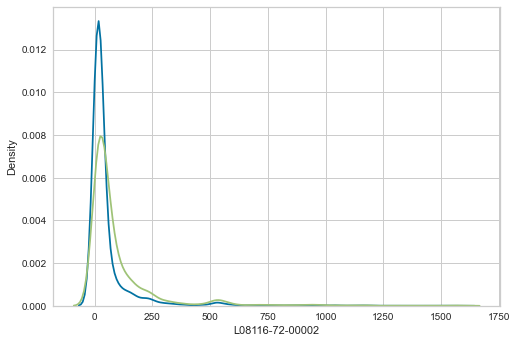

In [36]:
#Canvi distribucio
sns.kdeplot(Df_AltX['L08116-72-00002'], label='Original')
sns.kdeplot(Df_AltX_Smogn['L08116-72-00002'], label='Modificat')

In [ ]:
#Canvi distribucio
sns.kdeplot(Df_BaixX['L17055-72-00002'], label='Original')
sns.kdeplot(Df_BaixX_Smogn['L17055-72-00002'], label='Modificat')

In [ ]:
Df_Alty['L08116-72-00002'] = Df_AltX_Smogn['L08116-72-00002']
Df_AltX = Df_AltX_Smogn.drop(columns=['L08116-72-00002'])
Df_Baixy['L17055-72-00002'] = Df_BaixX_Smogn['L17055-72-00002']
Df_BaixX = Df_BaixX_Smogn.drop(columns=['L17055-72-00002'])

In [ ]:
Df_Alty = Df_AltX_Smogn['L08116-72-00002'].to_frame()
Df_Alty
Df_Baixy = Df_BaixX_Smogn['L17055-72-00002']
Df_Baixy

In [ ]:
Df_AltX.to_csv('dfAltXSMOGNCabal.csv',index=False)
Df_Alty.to_csv('dfAltYSMOGNCabal.csv',index=False)
Df_BaixX.to_csv('dfBaixXSMOGNCabal.csv',index=False)
Df_Baixy.to_csv('dfBaixYSMOGNCabal.csv',index=False)

## Data Augmentation (Adding Noise)

In [2]:
#Carregar del csv
Df_AltX = pd.read_csv('dfAltX.csv')
Df_Alty = pd.read_csv('dfAltY.csv')
Df_BaixX = pd.read_csv('dfBaixX.csv')
Df_Baixy = pd.read_csv('dfBaixY.csv')

In [3]:
Df_AltX.set_index('datetime', drop=True, inplace=True)
Df_BaixX.set_index('datetime', drop=True, inplace=True)

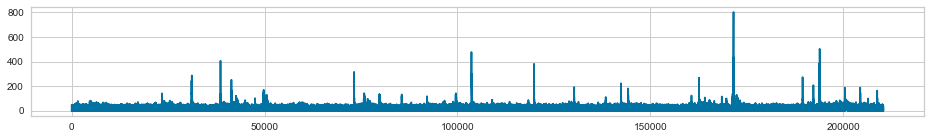

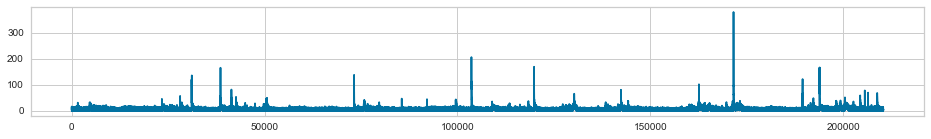

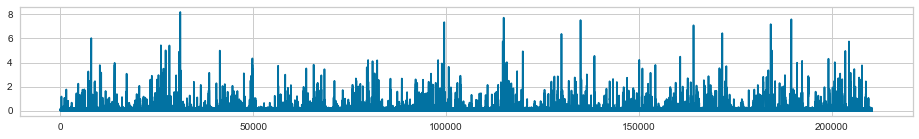

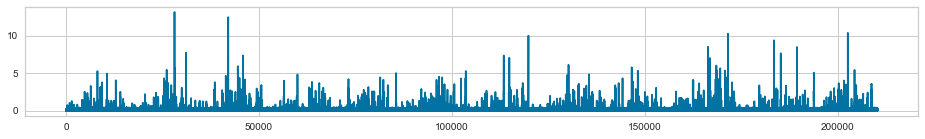

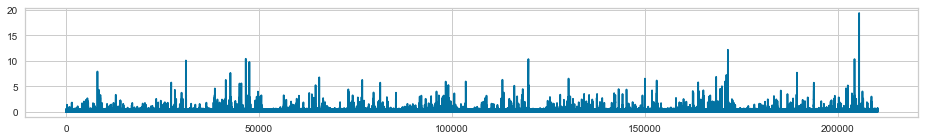

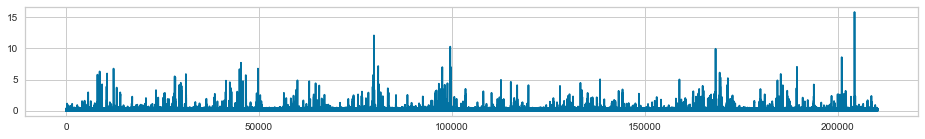

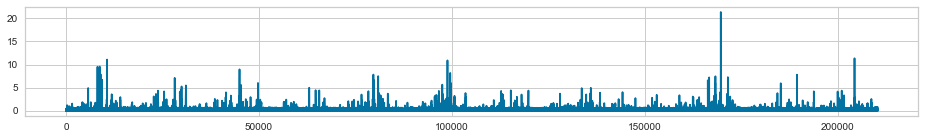

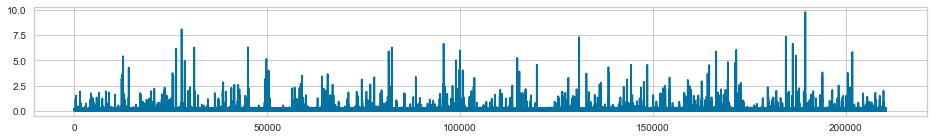

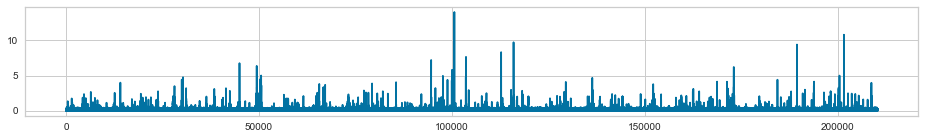

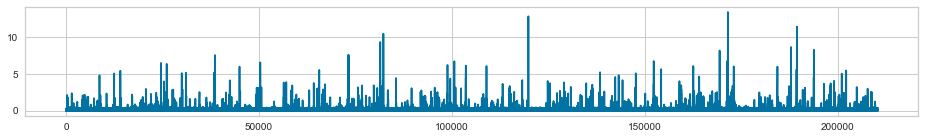

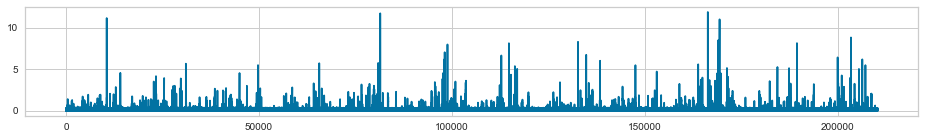

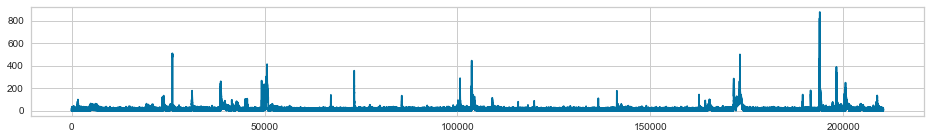

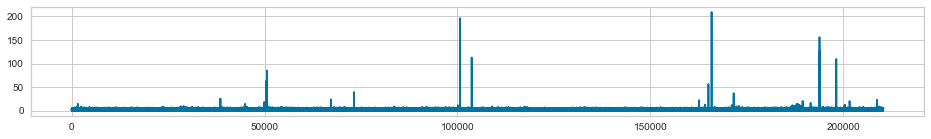

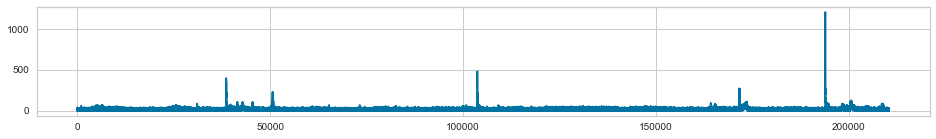

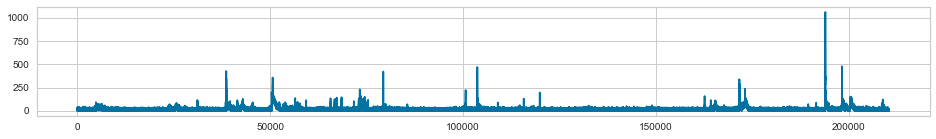

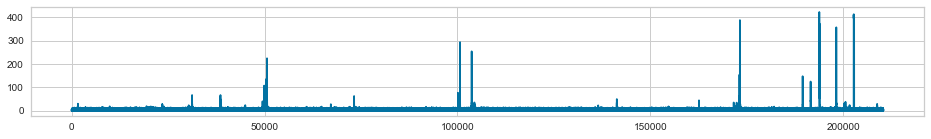

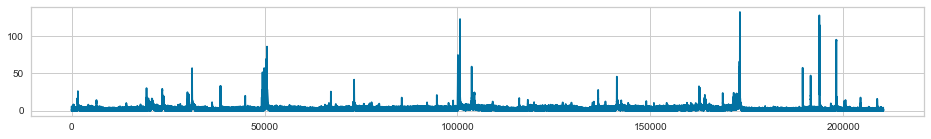

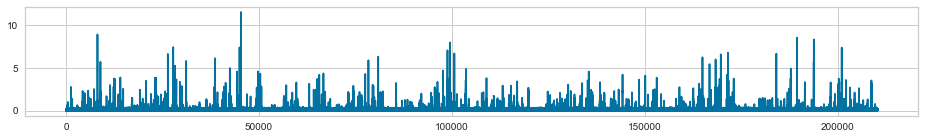

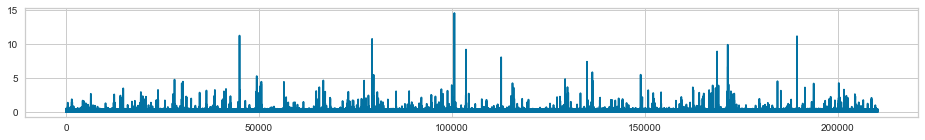

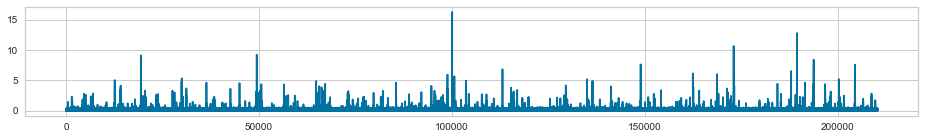

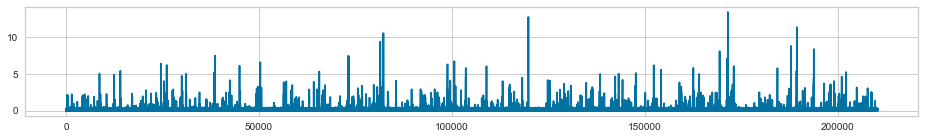

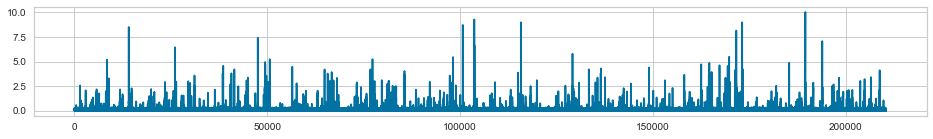

In [8]:
def addNoiseTimeSeries(df, scale=0.01):
    for column in df:
        array = df[column].to_numpy()
        aug = abs(tsaug.AddNoise(scale=scale).augment(array))
        df[column] = aug
        plot(aug)

addNoiseTimeSeries(Df_AltX)
addNoiseTimeSeries(Df_BaixX)


In [11]:
Df_AltX.to_csv('dfAltXNoise.csv')
Df_BaixX.to_csv('dfBaixXNoise.csv')

# Seleccionar DataSet

In [122]:
def datasetAlignNormal():
    Df_AltX = pd.read_csv('dfAltX.csv')
    Df_Alty = pd.read_csv('dfAltY.csv')
    Df_BaixX = pd.read_csv('dfBaixX.csv')
    Df_Baixy = pd.read_csv('dfBaixY.csv')
    Df_AltX.set_index('datetime', drop=True, inplace=True)
    Df_Alty.set_index('DATA', drop=True, inplace=True)
    Df_BaixX.set_index('datetime', drop=True, inplace=True)
    Df_Baixy.set_index('DATA', drop=True, inplace=True)
    
    return Df_AltX, Df_Alty, Df_BaixX, Df_Baixy

def datasetAlignAnomaliesPrecipitacions():
    Df_AltX = pd.read_csv('dfAltXAnomalies.csv')
    Df_Alty = pd.read_csv('dfAltYAnomalies.csv')
    Df_BaixX = pd.read_csv('dfBaixXAnomalies.csv')
    Df_Baixy = pd.read_csv('dfBaixYAnomalies.csv')
    Df_AltX.set_index('datetime', drop=True, inplace=True)
    Df_Alty.set_index('DATA', drop=True, inplace=True)
    Df_BaixX.set_index('datetime', drop=True, inplace=True)
    Df_Baixy.set_index('DATA', drop=True, inplace=True)
    
    return Df_AltX, Df_Alty, Df_BaixX, Df_Baixy

def datasetAlignStandard():
    Df_AltX = pd.read_csv('dfAltXStandard.csv')
    Df_Alty = pd.read_csv('dfAltYStandard.csv')
    Df_BaixX = pd.read_csv('dfBaixXStandard.csv')
    Df_Baixy = pd.read_csv('dfBaixYStandard.csv')
    Df_AltX.set_index('datetime', drop=True, inplace=True)
    Df_Alty.set_index('DATA', drop=True, inplace=True)
    Df_BaixX.set_index('datetime', drop=True, inplace=True)
    Df_Baixy.set_index('DATA', drop=True, inplace=True)
    
    return Df_AltX, Df_Alty, Df_BaixX, Df_Baixy


def datasetAlignAnomaliesPrecipitacionsMedian():
    Df_AltX = pd.read_csv('dfAltXAnomaliesMedian.csv')
    Df_Alty = pd.read_csv('dfAltYAnomaliesMedian.csv')
    Df_BaixX = pd.read_csv('dfBaixXAnomaliesMedian.csv')
    Df_Baixy = pd.read_csv('dfBaixYAnomaliesMedian.csv')
    Df_AltX.set_index('datetime', drop=True, inplace=True)
    Df_Alty.set_index('DATA', drop=True, inplace=True)
    Df_BaixX.set_index('datetime', drop=True, inplace=True)
    Df_Baixy.set_index('DATA', drop=True, inplace=True)
    
    return Df_AltX, Df_Alty, Df_BaixX, Df_Baixy


def datasetAlignAnomaliesCabal():
    Df_AltX = pd.read_csv('dfAltXAnomaliesCabal.csv')
    Df_Alty = pd.read_csv('dfAltYAnomaliesCabal.csv')
    Df_BaixX = pd.read_csv('dfBaixXAnomaliesCabal.csv')
    Df_Baixy = pd.read_csv('dfBaixYAnomaliesCabal.csv')
    Df_AltX.set_index('datetime', drop=True, inplace=True)
    Df_Alty.set_index('DATA', drop=True, inplace=True)
    Df_BaixX.set_index('datetime', drop=True, inplace=True)
    Df_Baixy.set_index('DATA', drop=True, inplace=True)
    
    return Df_AltX, Df_Alty, Df_BaixX, Df_Baixy

def datasetAlignNoise():
    Df_AltX = pd.read_csv('dfAltXNoise.csv')
    Df_Alty = pd.read_csv('dfAltY.csv')
    Df_BaixX = pd.read_csv('dfBaixXNoise.csv')
    Df_Baixy = pd.read_csv('dfBaixY.csv')
    Df_AltX.set_index('datetime', drop=True, inplace=True)
    Df_Alty.set_index('DATA', drop=True, inplace=True)
    Df_BaixX.set_index('datetime', drop=True, inplace=True)
    Df_Baixy.set_index('DATA', drop=True, inplace=True)
    
    return Df_AltX, Df_Alty, Df_BaixX, Df_Baixy

def datasetAlignSMOGN():
    Df_AltX = pd.read_csv('dfAltXSMOGN.csv')
    Df_Alty = pd.read_csv('dfAltYSMOGN.csv')
    Df_BaixX = pd.read_csv('dfBaixXSMOGN.csv')
    Df_Baixy = pd.read_csv('dfBaixYSMOGN.csv')

    return Df_AltX, Df_Alty, Df_BaixX, Df_Baixy

def datasetAlignSMOGNCabal():
    Df_AltX = pd.read_csv('dfAltXSMOGNCabal.csv')
    Df_Alty = pd.read_csv('dfAltYSMOGNCabal.csv')
    Df_BaixX = pd.read_csv('dfBaixXSMOGNCabal.csv')
    Df_Baixy = pd.read_csv('dfBaixYSMOGNCabal.csv')

    return Df_AltX, Df_Alty, Df_BaixX, Df_Baixy

def datasetPredictionsAlt():
    dataPredictionsX = pd.read_csv('dfAltX.csv')
    dataPredictionsX.set_index('datetime', drop=True, inplace=True)
    dataPredictionsY = pd.read_csv('dfAltY.csv')
    dataPredictionsY.set_index('DATA', drop=True, inplace=True)
    
    return dataPredictionsX, dataPredictionsY

def datasetPredictionsBaix():
    dataPredictionsX = pd.read_csv('dfBaixX.csv')
    dataPredictionsX.set_index('datetime', drop=True, inplace=True)
    dataPredictionsY = pd.read_csv('dfBaixY.csv')
    dataPredictionsY.set_index('DATA', drop=True, inplace=True)
    
    return dataPredictionsX, dataPredictionsY



In [133]:
Df_AltX, Df_Alty, Df_BaixX, Df_Baixy = datasetAlignSMOGN()
dataPredictionsAltX, dataPredictionsAltY = datasetPredictionsAlt()
dataPredictionsBaixX, dataPredictionsBaixY = datasetPredictionsBaix()

# Models Alt Ter

# Random Forest (Alt Ter)

In [107]:
def randomForestAltTer(df_results_altTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = { 
        'n_estimators': [50,100, 200], # Nombre de arbres
        'max_features': [1, 'sqrt', 'log2'], # Maxim features
        'max_depth' : [8,10,25,None] # Profunditat dels arbres
    }

    *_, last = tscv.split(Df_AltX)
    staticTest_index = last[1]

    iteracio = 0
    for train_index, test_index in tscv.split(Df_AltX):
        iteracio += 1
        if staticTest == False:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[test_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[test_index]
        else:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[staticTest_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[staticTest_index]

        model = RandomForestRegressor()
        tscv = TimeSeriesSplit()
        gsearch = HalvingGridSearchCV(estimator=model, cv=tscv, param_grid=param_search, n_jobs=-1)
        print("Iteració: ", iteracio)
        gsearchfited = gsearch.fit(Df_AltX_train, Df_Alty_train)

        bestParams = gsearchfited.best_params_
        score = gsearchfited.score(Df_AltX_test, Df_Alty_test)
        FeatureImportance = gsearchfited.best_estimator_.feature_importances_

        predicty = gsearchfited.best_estimator_.predict(Df_AltX_test)
        rmseScore = mean_squared_error(Df_Alty_test, predicty, squared=False)

        nameh = Df_AltX.columns[0]
        hores = "1 day"

        viz = FeatureImportances(gsearchfited.best_estimator_)
        viz.fit(Df_AltX, Df_Alty)
        viz.show()

        plotYtestAnomaly1 = dataPredictionsAltY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsAltY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsAltY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsAltY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsAltX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsAltX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsAltX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsAltX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = gsearchfited.best_estimator_.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = gsearchfited.best_estimator_.predict(plotXtestAnomaly2.values)
        predictStandard1 = gsearchfited.best_estimator_.predict(plotXtestStandard1.values)
        predictStandard2 = gsearchfited.best_estimator_.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'Random Forest','RMSE Total':rmseScore, 'Score':score,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_altTer = df_results_altTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()


    stop = timeit.default_timer()
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    
    return df_results_altTer



# XGBoost (Alt Ter)

In [108]:
def xgboostAltTer(df_results_altTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = { 
        'n_estimators': [50,100, 200], # Nombre de arbres
        'max_features': [1, 'sqrt', 'log2'], # Maxim features
        'max_depth' : [8,10,25,None] # Profunditat dels arbres
    }
    
    
    *_, last = tscv.split(Df_AltX)
    staticTest_index = last[1]

    iteracio = 0
    for train_index, test_index in tscv.split(Df_AltX):
        iteracio += 1
        if staticTest == False:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[test_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[test_index]
        else:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[staticTest_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[staticTest_index]

        model = xgb.XGBRegressor()
        tscv = TimeSeriesSplit()
        gsearch = HalvingGridSearchCV(estimator=model, cv=tscv, param_grid=param_search, n_jobs=-1)
        print("Iteració: ", iteracio)
        gsearchfited = gsearch.fit(Df_AltX_train, Df_Alty_train)

        bestParams = gsearchfited.best_params_
        score = gsearchfited.score(Df_AltX_test, Df_Alty_test)
        FeatureImportance = gsearchfited.best_estimator_.feature_importances_

        predicty = gsearchfited.best_estimator_.predict(Df_AltX_test)
        rmseScore = mean_squared_error(Df_Alty_test, predicty, squared=False)

        nameh = Df_AltX.columns[0]
        hores = "1 day"

        viz = FeatureImportances(gsearchfited.best_estimator_)
        viz.fit(Df_AltX, Df_Alty)
        viz.show()

        plotYtestAnomaly1 = dataPredictionsAltY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsAltY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsAltY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsAltY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsAltX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsAltX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsAltX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsAltX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]


        predictAnomaly1 = gsearchfited.best_estimator_.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = gsearchfited.best_estimator_.predict(plotXtestAnomaly2.values)
        predictStandard1 = gsearchfited.best_estimator_.predict(plotXtestStandard1.values)
        predictStandard2 = gsearchfited.best_estimator_.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)



        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'XGBoost','RMSE Total':rmseScore, 'Score':score,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_altTer = df_results_altTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()

    stop = timeit.default_timer()
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    
    return df_results_altTer

## LightGBM (Alt Ter)

In [109]:
def lightgbmAltTer(df_results_altTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = {
                            "objective": "regression",
                            "metric": "rmse",
                            "verbosity": -1,
                            "boosting_type": "gbdt",
                            "seed": 42,
                            'linear_tree': False,
                            'learning_rate': .15,
                            'min_child_samples': 5,
                            'num_leaves': 31,
                            'num_iterations': 50
                        }

    *_, last = tscv.split(Df_AltX)
    staticTest_index = last[1]

    iteracio = 0
    for train_index, test_index in tscv.split(Df_AltX):
        iteracio += 1
        if staticTest == False:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[test_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[test_index]
        else:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[staticTest_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[staticTest_index]

        print(Df_AltX.iloc[test_index].index[0])

        model = lgb.LGBMRegressor(first_metric_only = True, **param_search)

        model.fit(Df_AltX_train, Df_Alty_train,
              eval_metric = 'l1', 
              eval_set = [(Df_AltX_test, Df_Alty_test)],
              #early_stopping_rounds = 10,
              verbose = 0)
        predicty = model.predict(Df_AltX_test)
        rmseScore = mean_squared_error(Df_Alty_test, predicty, squared=False)

        nameh = Df_AltX.columns[0]
        hores = "1 day"



        #joblib.dump(gsearchfited.best_estimator_, 'resultsDf/pickle/partAlta/XGBoost_'+str(df_results_altTer.index[-1])+'.pkl', compress = 1)

        #viz = FeatureImportances(gsearchfited.best_estimator_)
        #viz.fit(Df_AltX, Df_Alty)
        #viz.show()

        plotYtestAnomaly1 = dataPredictionsAltY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsAltY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsAltY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsAltY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsAltX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsAltX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsAltX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsAltX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = model.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = model.predict(plotXtestAnomaly2.values)
        predictStandard1 = model.predict(plotXtestStandard1.values)
        predictStandard2 = model.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'LightGBM','RMSE Total':rmseScore,'Score':None,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_altTer = df_results_altTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()


    stop = timeit.default_timer()
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    
    return df_results_altTer

# CatBoost (Alt Ter)

In [110]:
def catBoostAltTer(df_results_altTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = {
        'n_estimators': 2000,
        'max_depth': 4,
        'num_leaves': 2**4,
        'learning_rate': 0.1,
        'boosting_type': 'dart'
    }


    *_, last = tscv.split(Df_AltX)
    staticTest_index = last[1]

    iteracio = 0
    for train_index, test_index in tscv.split(Df_AltX):
        iteracio += 1
        if staticTest == False:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[test_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[test_index]
        else:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[staticTest_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[staticTest_index]
    
        print(Df_AltX.iloc[test_index].index[0])

        model = CatBoostRegressor(loss_function='RMSE', depth=3, learning_rate=0.4, iterations=1000, 
        random_seed=18, 
        od_type='Iter',
        od_wait=20)

        model.fit(Df_AltX_train, Df_Alty_train,
              use_best_model=True, 
              eval_set = (Df_AltX_test, Df_Alty_test),
              #early_stopping_rounds = 10,
              verbose = 0,
            plot=True)
        predicty = model.predict(Df_AltX_test)
        rmseScore = mean_squared_error(Df_Alty_test, predicty, squared=False)

        nameh = Df_AltX.columns[0]
        hores = "1 day"



        #joblib.dump(gsearchfited.best_estimator_, 'resultsDf/pickle/partAlta/XGBoost_'+str(df_results_altTer.index[-1])+'.pkl', compress = 1)

        #viz = FeatureImportances(gsearchfited.best_estimator_)
        #viz.fit(Df_AltX, Df_Alty)
        #viz.show()

        plotYtestAnomaly1 = dataPredictionsAltY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsAltY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsAltY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsAltY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsAltX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsAltX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsAltX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsAltX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = model.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = model.predict(plotXtestAnomaly2.values)
        predictStandard1 = model.predict(plotXtestStandard1.values)
        predictStandard2 = model.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'CatBoost','RMSE Total':rmseScore,'Score':None,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_altTer = df_results_altTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()

    
    stop = timeit.default_timer()
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    
    return df_results_altTer

# ExtraTrees (Alt Ter)

In [111]:
def extraTreesAltTer(df_results_altTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = { 
        'n_estimators': [50,100, 200], # Nombre de arbres
        'max_features': [1, 'sqrt', 'log2'], # Maxim features
        'max_depth' : [8,10,25,None] # Profunditat dels arbres
    }

    *_, last = tscv.split(Df_AltX)
    staticTest_index = last[1]

    iteracio = 0
    for train_index, test_index in tscv.split(Df_AltX):
        iteracio += 1
        if staticTest == False:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[test_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[test_index]
        else:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[staticTest_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[staticTest_index]

        model = ExtraTreesRegressor()
        tscv = TimeSeriesSplit()
        gsearch = HalvingGridSearchCV(estimator=model, cv=tscv, param_grid=param_search, n_jobs=-1)
        print("Iteració: ", iteracio)
        gsearchfited = gsearch.fit(Df_AltX_train, Df_Alty_train)

        bestParams = gsearchfited.best_params_
        score = gsearchfited.score(Df_AltX_test, Df_Alty_test)
        FeatureImportance = gsearchfited.best_estimator_.feature_importances_

        predicty = gsearchfited.best_estimator_.predict(Df_AltX_test)
        rmseScore = mean_squared_error(Df_Alty_test, predicty, squared=False)

        nameh = Df_AltX.columns[0]
        hores = "1 day"




        viz = FeatureImportances(gsearchfited.best_estimator_)
        viz.fit(Df_AltX, Df_Alty)
        viz.show()

        plotYtestAnomaly1 = dataPredictionsAltY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsAltY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsAltY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsAltY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsAltX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsAltX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsAltX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsAltX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = gsearchfited.best_estimator_.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = gsearchfited.best_estimator_.predict(plotXtestAnomaly2.values)
        predictStandard1 = gsearchfited.best_estimator_.predict(plotXtestStandard1.values)
        predictStandard2 = gsearchfited.best_estimator_.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'Extra Trees','RMSE Total':rmseScore, 'Score':score,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_altTer = df_results_altTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()


    stop = timeit.default_timer()
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    
    return df_results_altTer

# KNNRegressor (Alt Ter)

In [112]:
def knnRegressorAltTer(df_results_altTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = { 
        'n_neighbors': [1, 3, 5, 10, 20], # Nombre de neighbors
        'leaf_size': [20, 30, 50], # Mida fulles
        'weights': ['uniform','distance']
    }

    *_, last = tscv.split(Df_AltX)
    staticTest_index = last[1]

    iteracio = 0
    for train_index, test_index in tscv.split(Df_AltX):
        iteracio += 1
        if staticTest == False:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[test_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[test_index]
        else:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[staticTest_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[staticTest_index]

        model = KNeighborsRegressor()
        tscv = TimeSeriesSplit()
        gsearch = HalvingGridSearchCV(estimator=model, cv=tscv, param_grid=param_search, n_jobs=-1)
        print("Iteració: ", iteracio)
        gsearchfited = gsearch.fit(Df_AltX_train, Df_Alty_train)

        bestParams = gsearchfited.best_params_
        score = gsearchfited.score(Df_AltX_test, Df_Alty_test)

        predicty = gsearchfited.best_estimator_.predict(Df_AltX_test)
        rmseScore = mean_squared_error(Df_Alty_test, predicty, squared=False)

        nameh = Df_AltX.columns[0]
        hores = "1 day"


        plotYtestAnomaly1 = dataPredictionsAltY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsAltY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsAltY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsAltY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsAltX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsAltX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsAltX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsAltX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = gsearchfited.best_estimator_.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = gsearchfited.best_estimator_.predict(plotXtestAnomaly2.values)
        predictStandard1 = gsearchfited.best_estimator_.predict(plotXtestStandard1.values)
        predictStandard2 = gsearchfited.best_estimator_.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'KNNRegressor','RMSE Total':rmseScore, 'Score':score,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_altTer = df_results_altTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()


    stop = timeit.default_timer()
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    
    return df_results_altTer

# Linear Regression (Alt Ter)

In [113]:
def linearRegressionAltTer(df_results_altTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = { 
        'n_estimators': [50,100, 200], # Nombre de arbres
        'max_features': [1, 'sqrt', 'log2'], # Maxim features
        'max_depth' : [8,10,25,None] # Profunditat dels arbres
    }

    iteracio = 0
    *_, last = tscv.split(Df_AltX)
    staticTest_index = last[1]

    iteracio = 0
    for train_index, test_index in tscv.split(Df_AltX):
        iteracio += 1
        if staticTest == False:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[test_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[test_index]
        else:
            Df_AltX_train, Df_AltX_test = Df_AltX.values[train_index], Df_AltX.values[staticTest_index]
            Df_Alty_train, Df_Alty_test = Df_Alty.values.ravel()[train_index], Df_Alty.values.ravel()[staticTest_index]

        model = RANSACRegressor()
        print("Iteració: ", iteracio)
        modelfited = model.fit(Df_AltX_train, Df_Alty_train)

        score = modelfited.score(Df_AltX_test, Df_Alty_test)

        predicty = modelfited.predict(Df_AltX_test)
        rmseScore = mean_squared_error(Df_Alty_test, predicty, squared=False)


        hores = "1 day"



        #joblib.dump(modelfited, 'resultsDf/pickle/partAlta/LinearRegression_'+str(df_results_altTer.index[-1])+'.pkl', compress = 1)

        plotYtestAnomaly1 = dataPredictionsAltY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsAltY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsAltY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsAltY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsAltX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsAltX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsAltX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsAltX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = modelfited.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = modelfited.predict(plotXtestAnomaly2.values)
        predictStandard1 = modelfited.predict(plotXtestStandard1.values)
        predictStandard2 = modelfited.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'Linear Regression','RMSE Total':rmseScore, 'Score':score,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_altTer = df_results_altTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()


    stop = timeit.default_timer()
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    
    return df_results_altTer

In [134]:
df_results_altTer = pd.DataFrame(columns = ["Method","Score","Prediccio_Hores"])

Iteració:  1


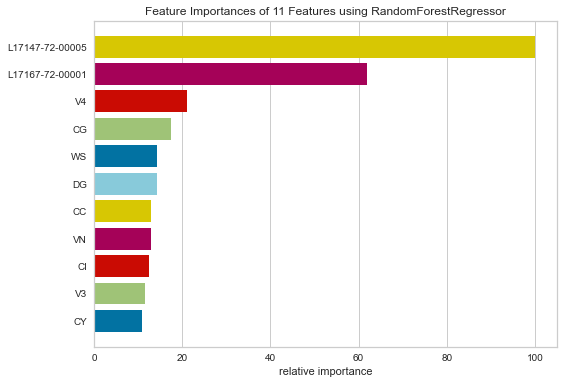

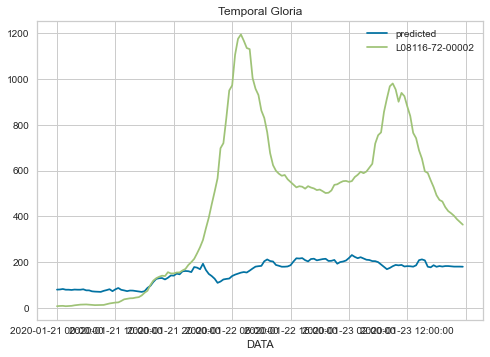

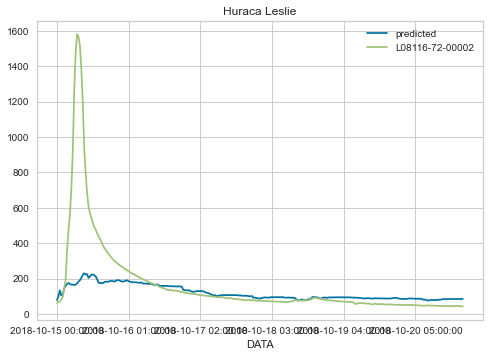

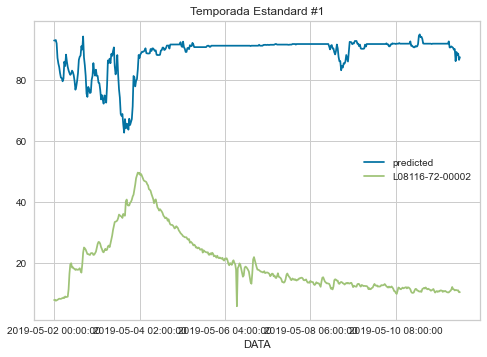

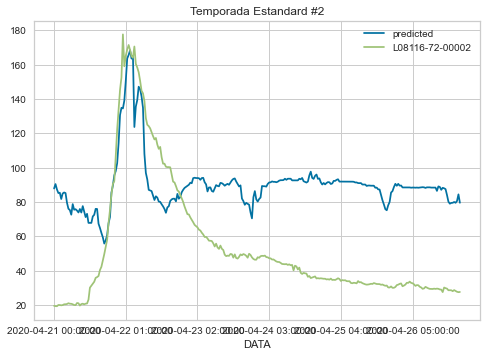

Iteració:  2


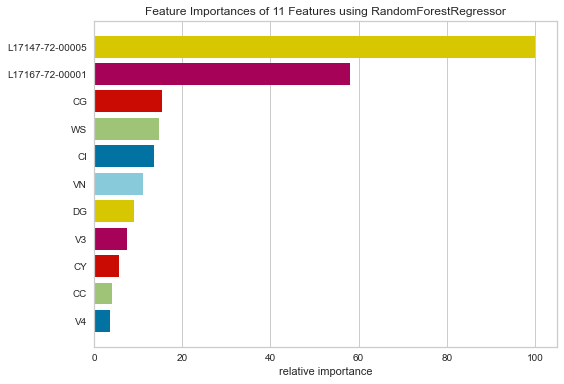

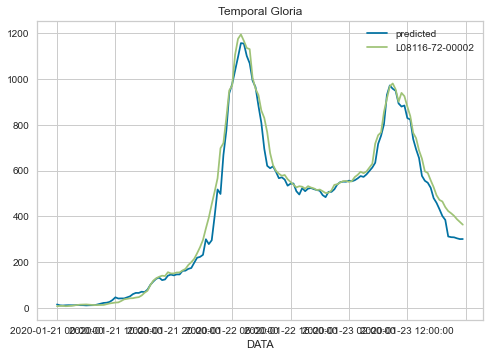

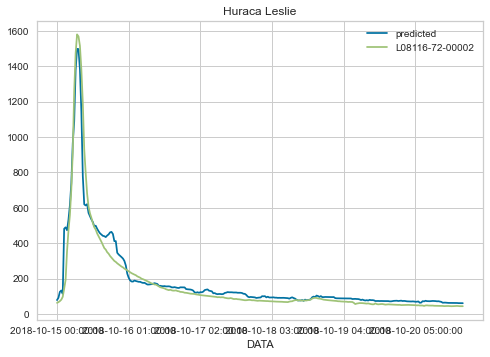

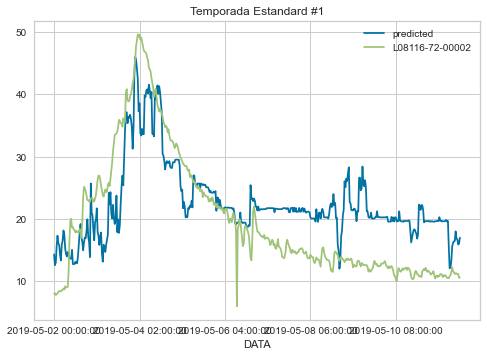

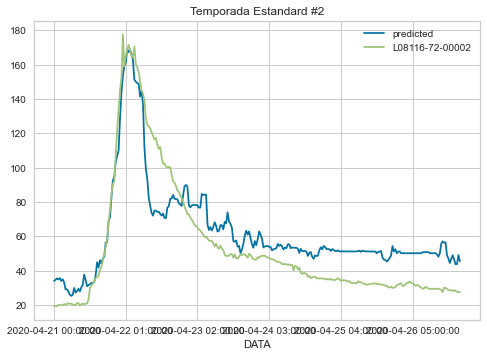

Iteració:  3


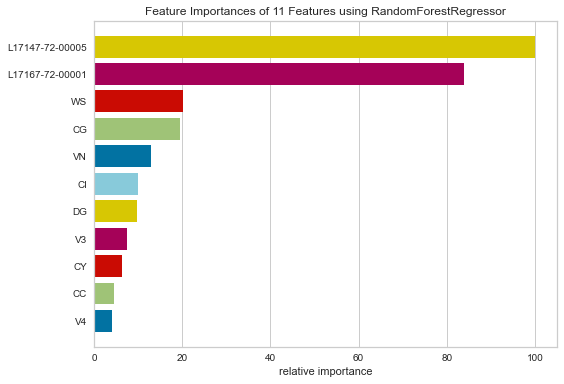

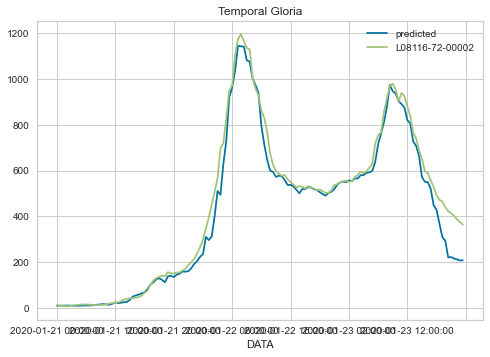

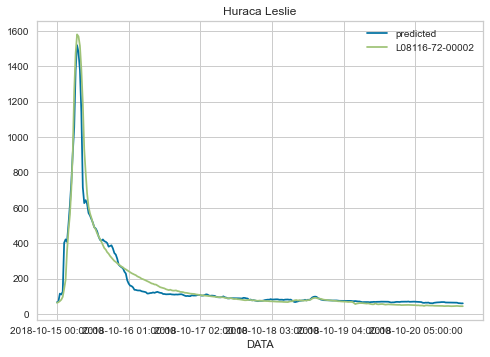

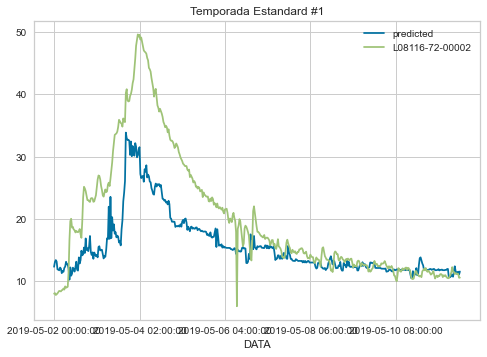

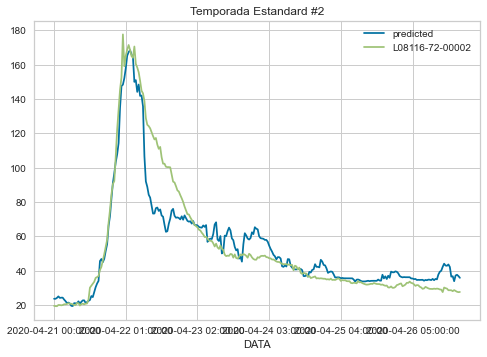

Time:  0:00:23.110773
Iteració:  1
[20:54:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




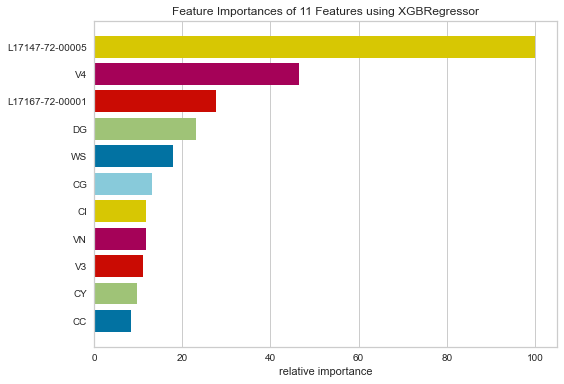

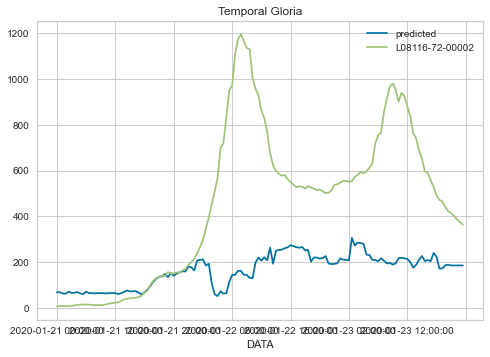

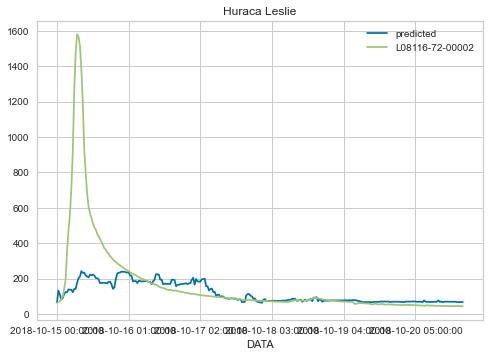

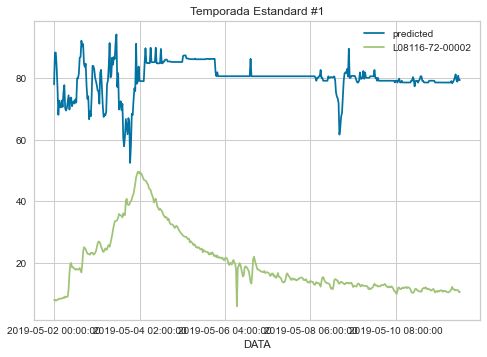

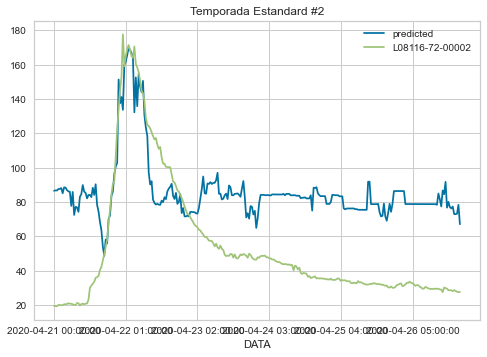

Iteració:  2
[20:55:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




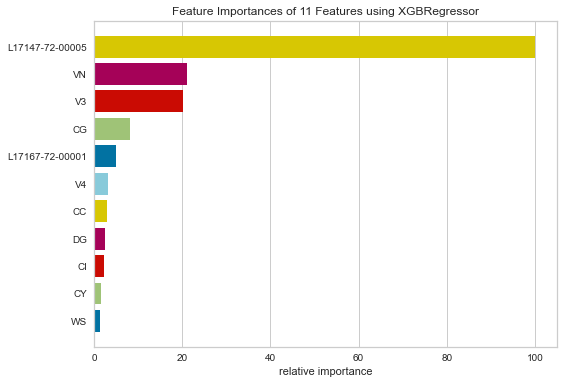

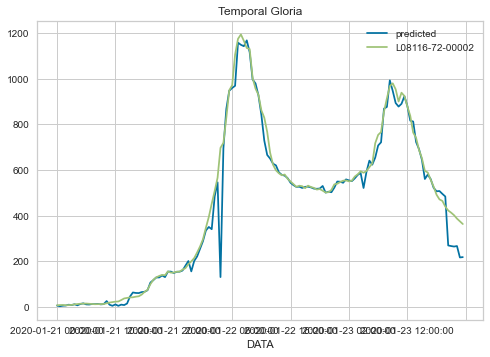

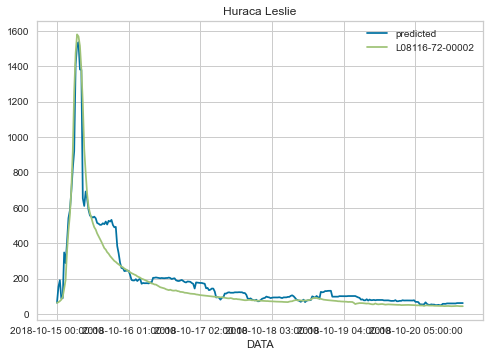

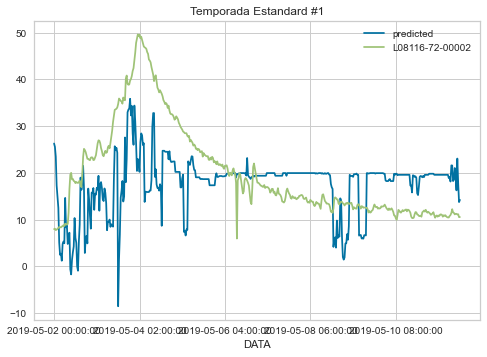

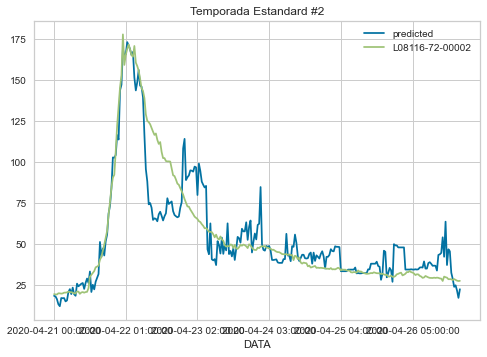

Iteració:  3
[20:55:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




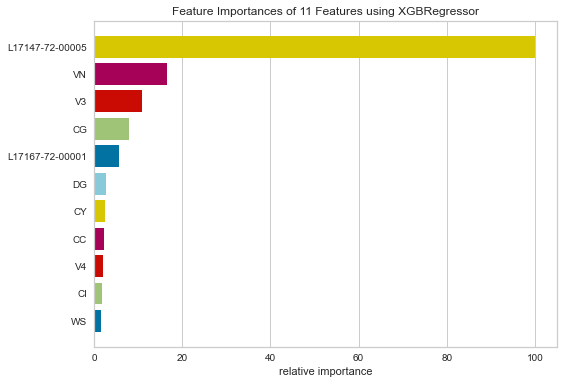

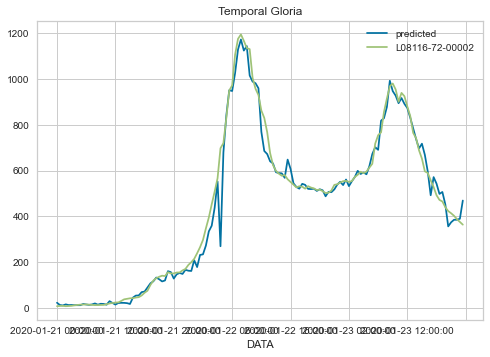

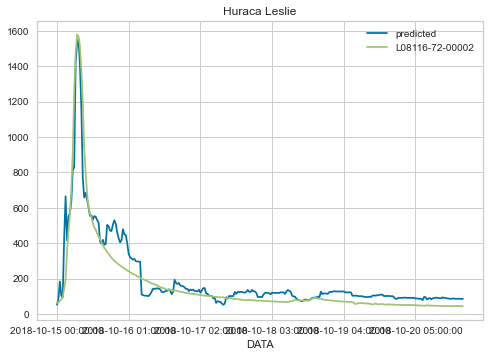

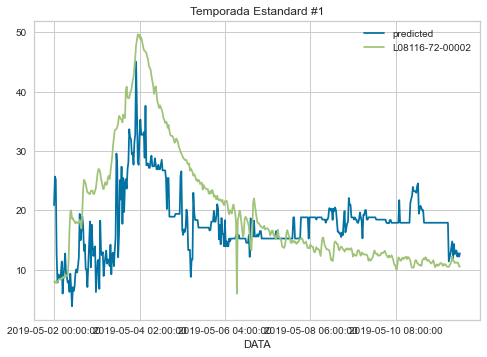

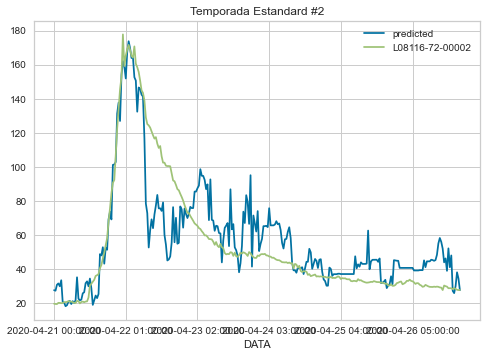

Time:  0:00:16.179626
2095


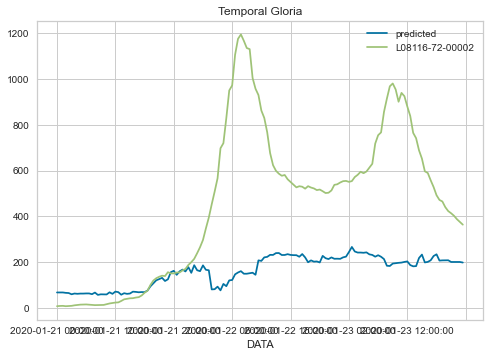

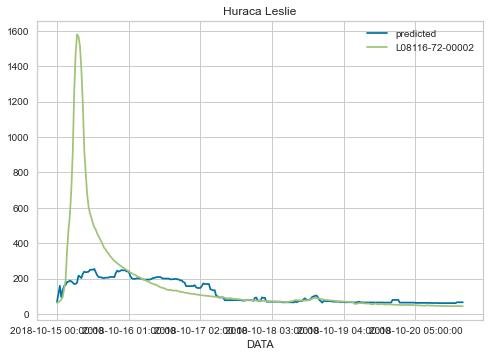

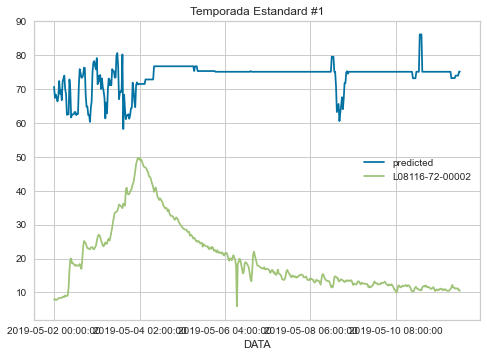

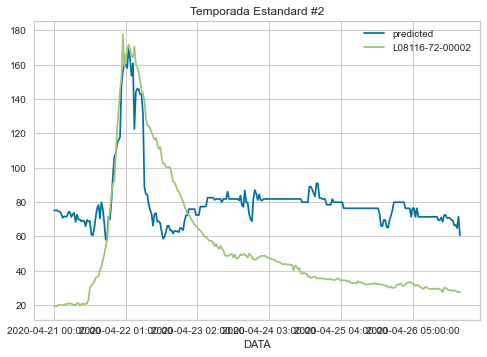

4187


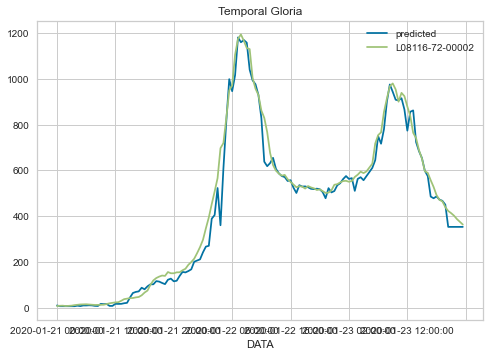

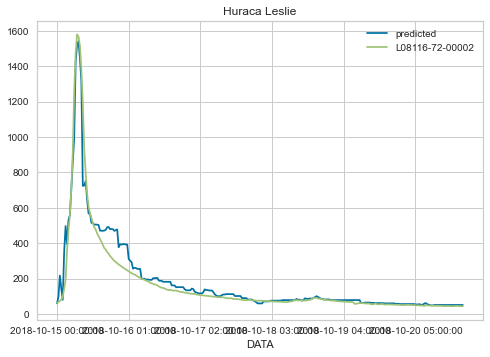

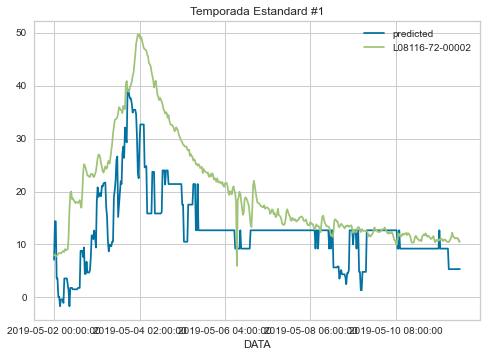

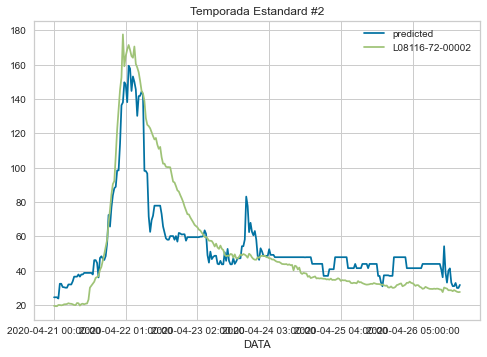

6279


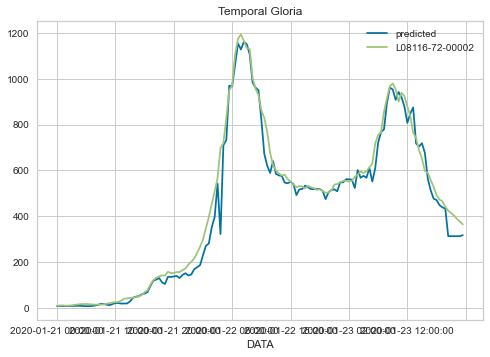

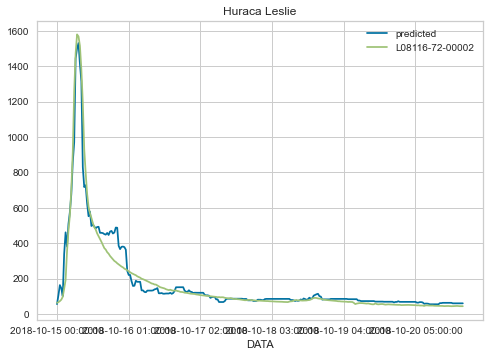

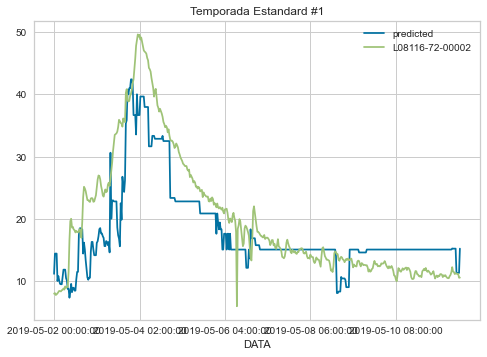

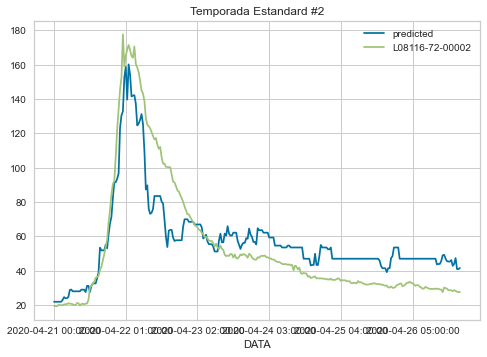

Time:  0:00:01.515062
2095


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

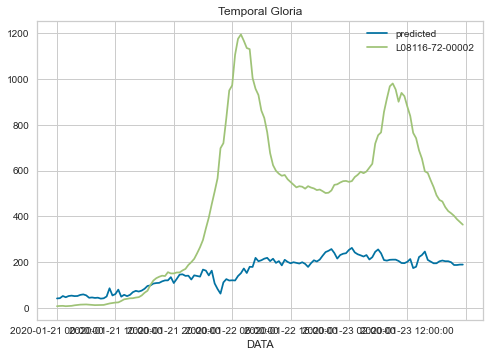

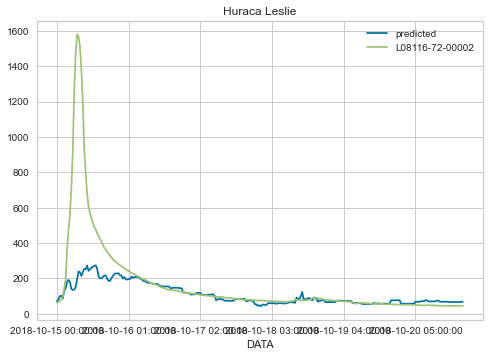

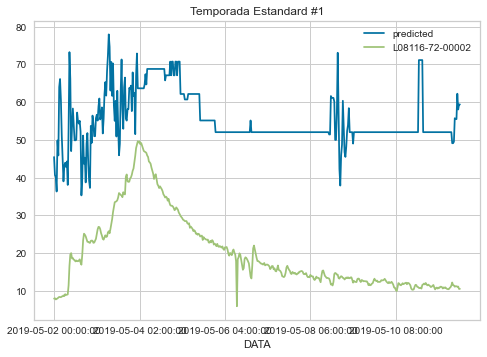

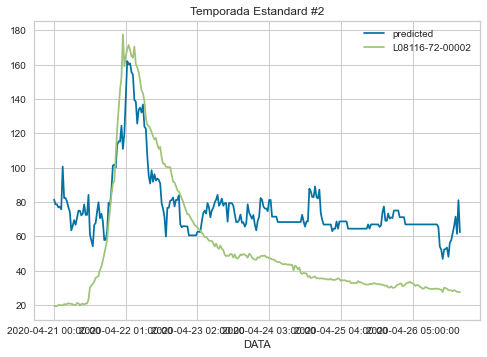

4187


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

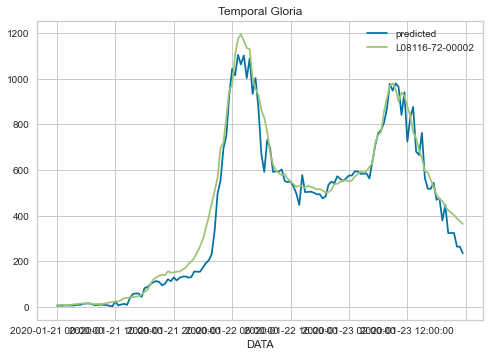

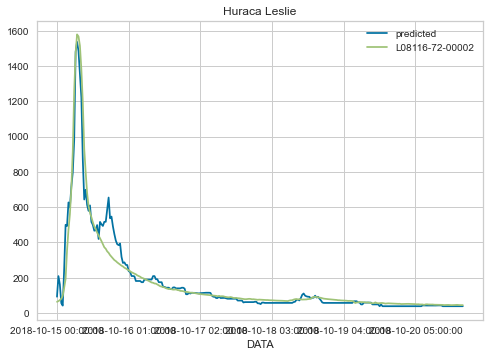

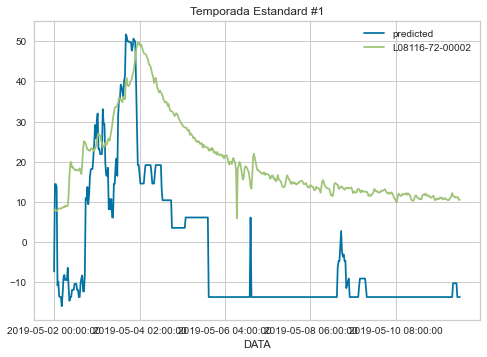

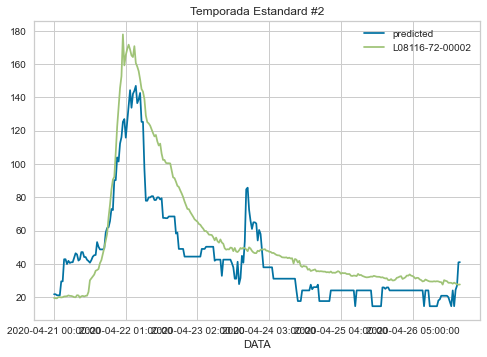

6279


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

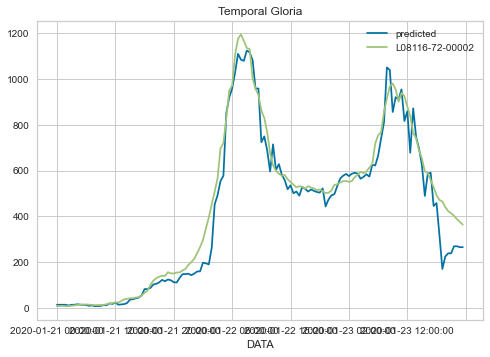

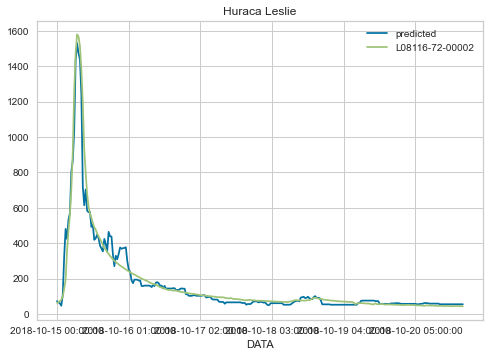

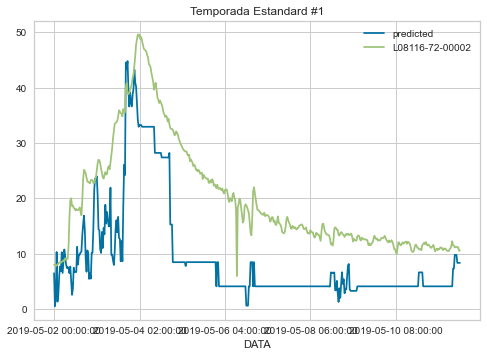

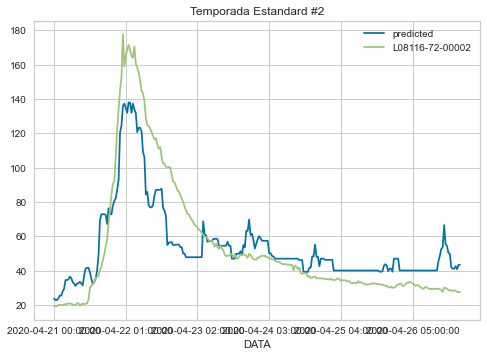

Time:  0:00:02.453220
Iteració:  1


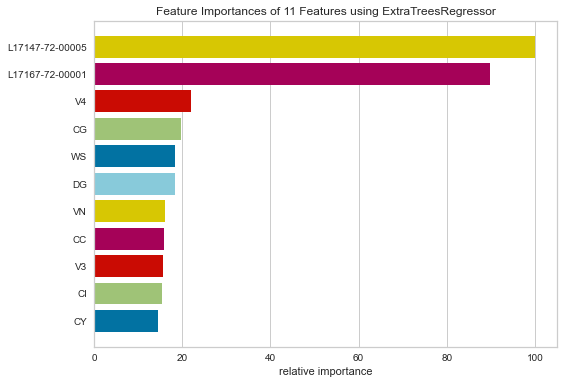

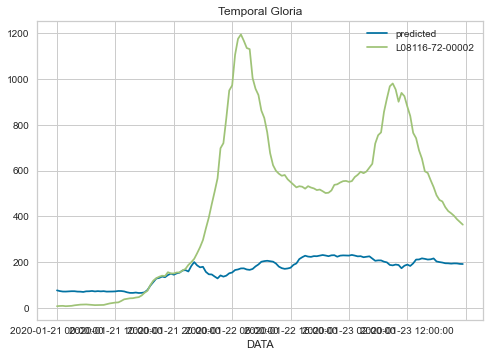

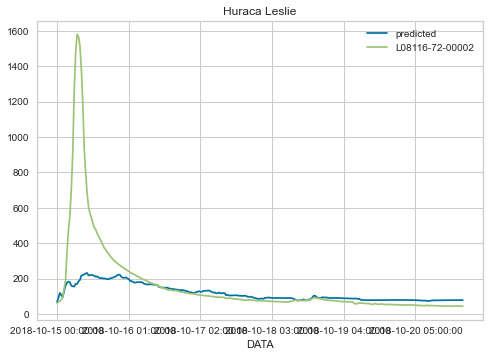

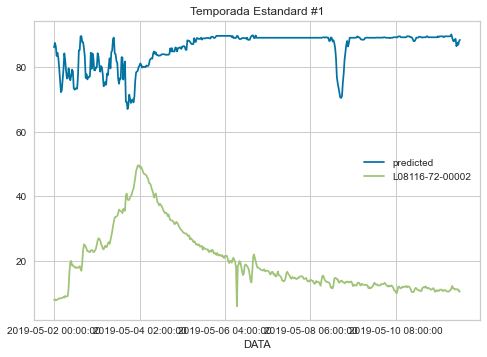

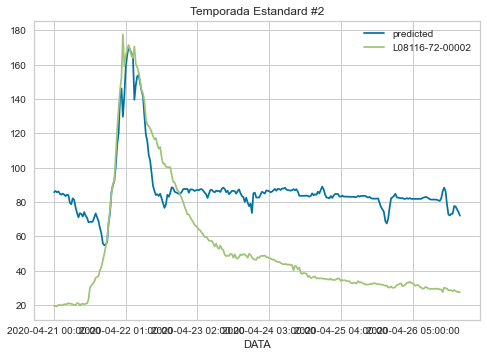

Iteració:  2


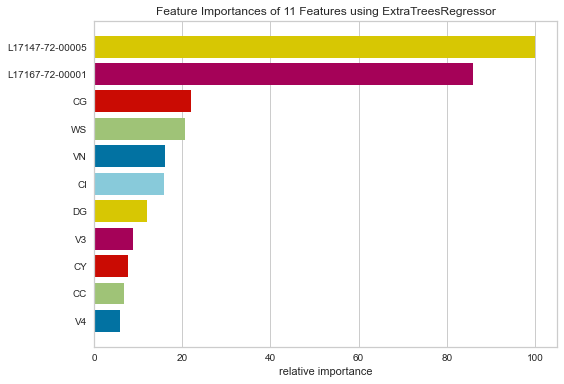

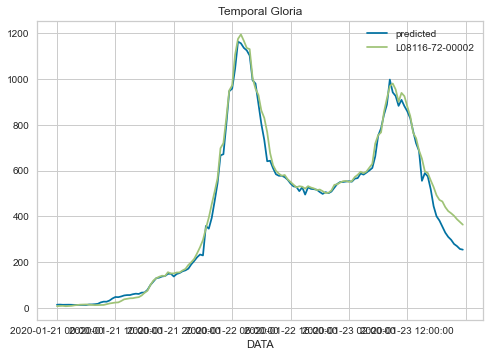

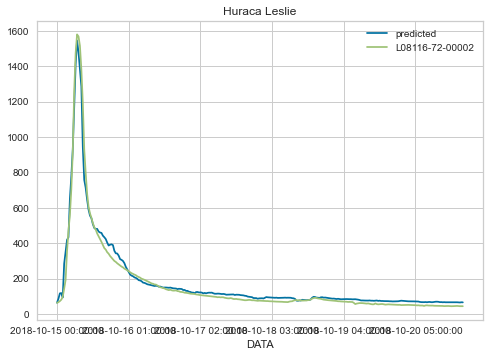

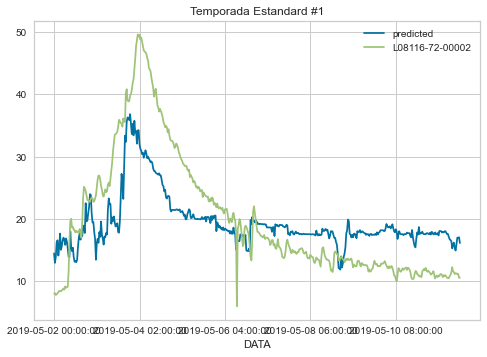

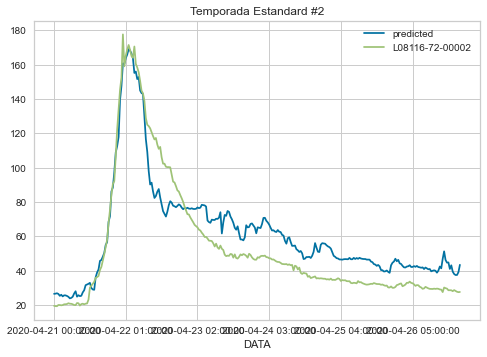

Iteració:  3


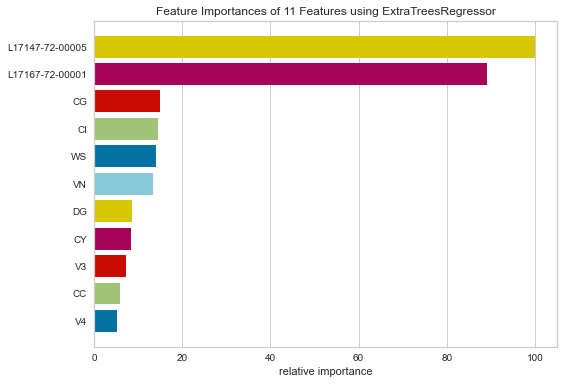

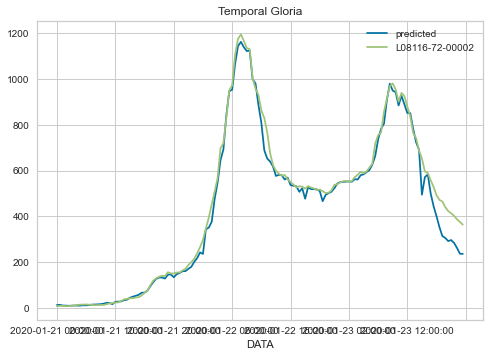

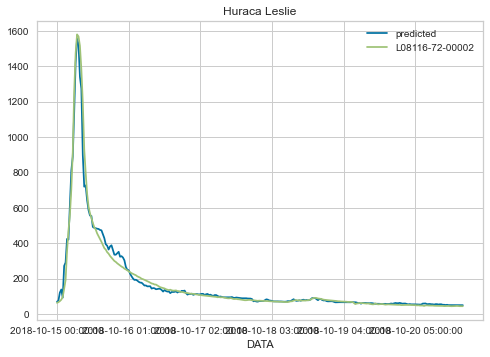

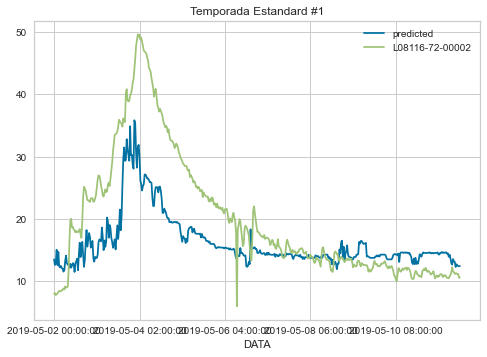

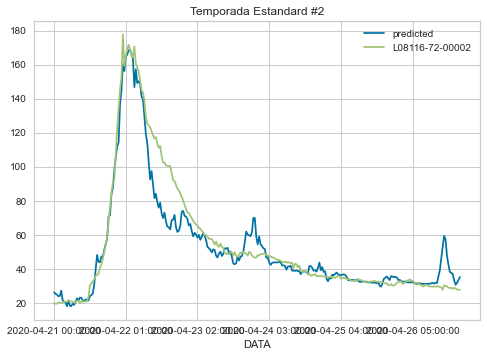

Time:  0:00:16.261579
Iteració:  1


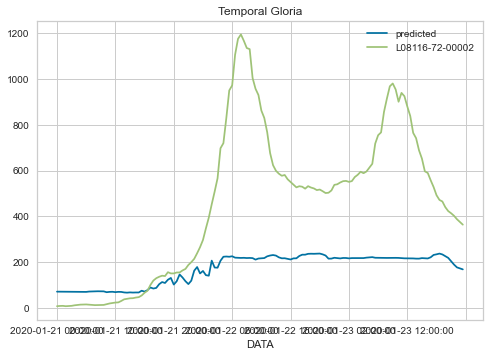

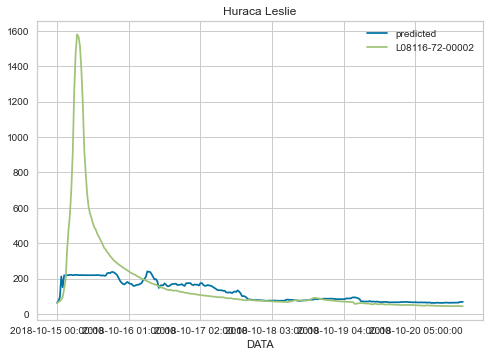

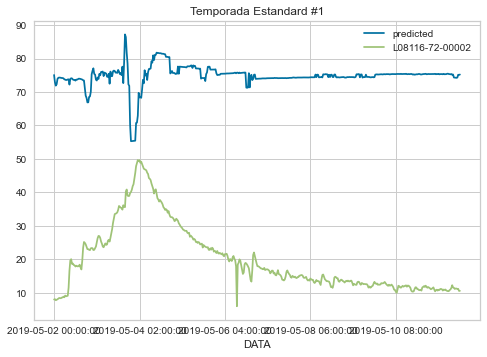

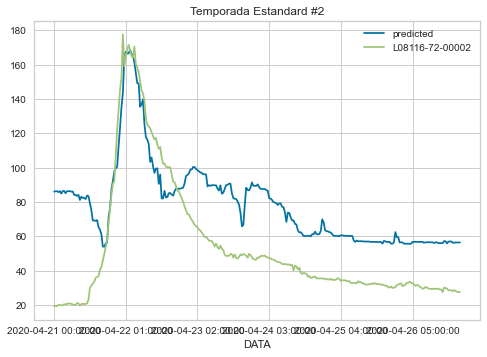

Iteració:  2


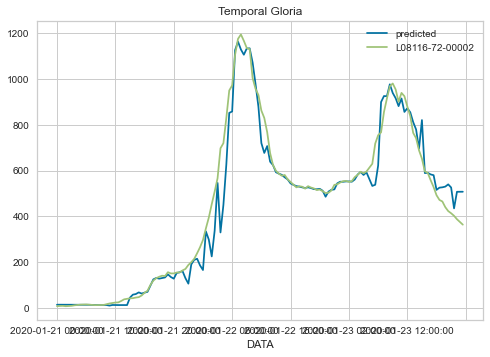

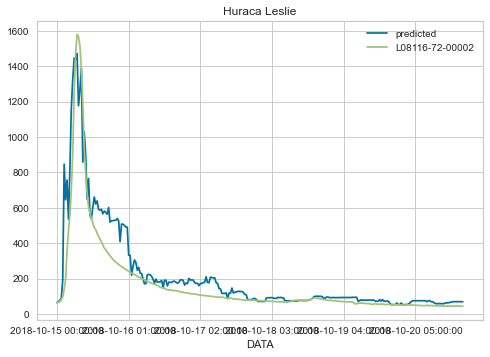

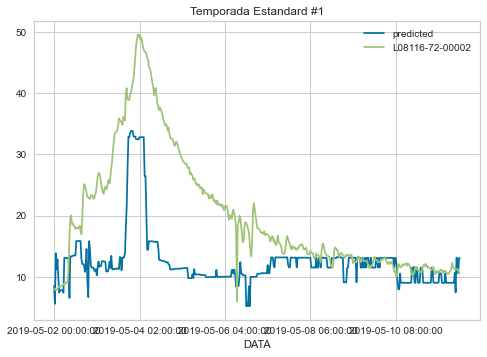

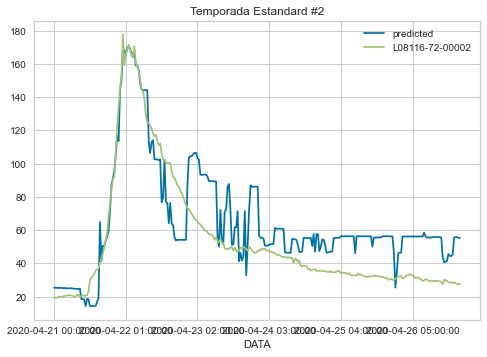

Iteració:  3


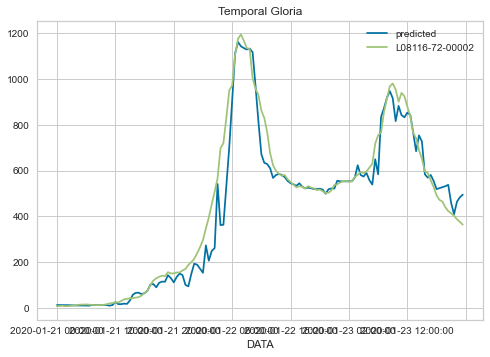

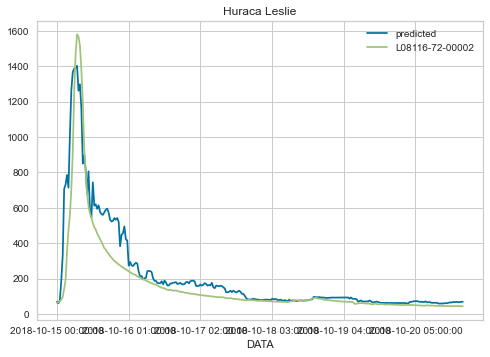

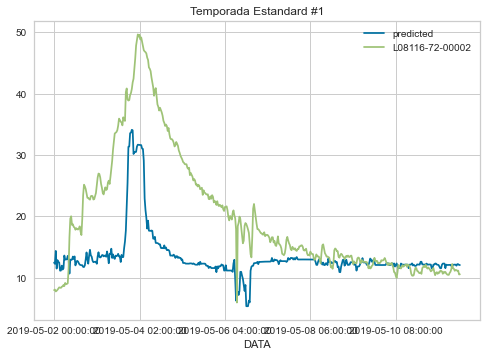

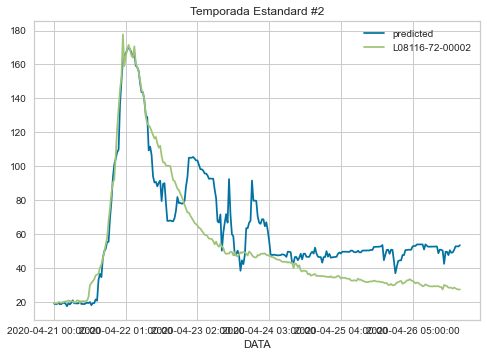

Time:  0:00:02.125212
Iteració:  1


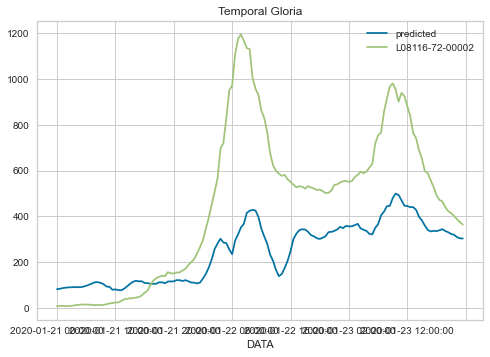

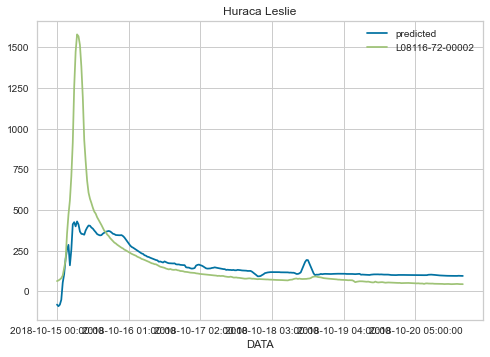

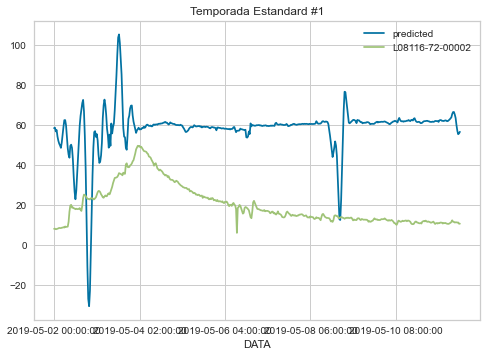

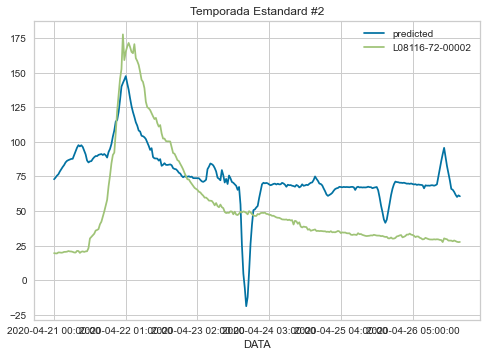

Iteració:  2


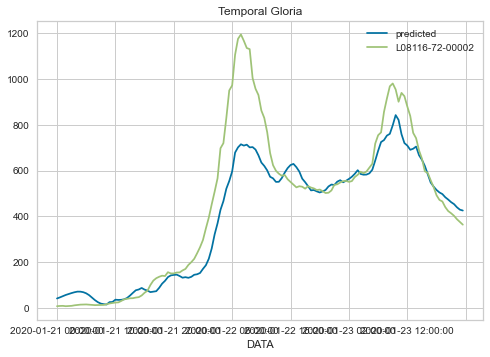

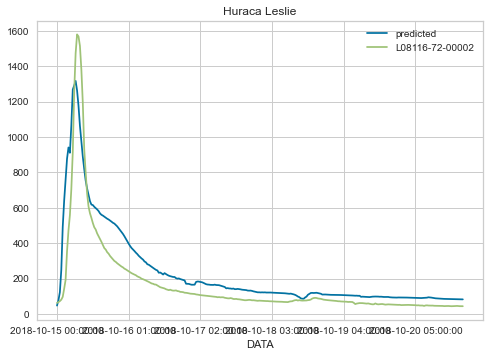

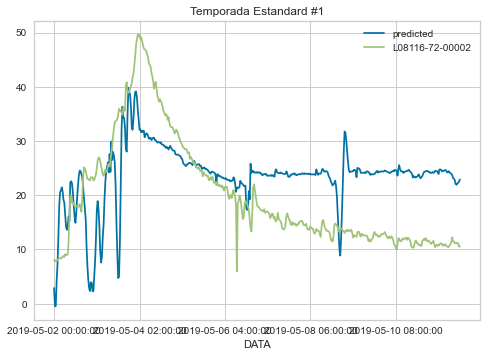

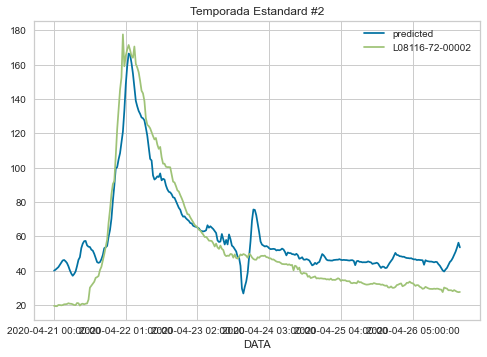

Iteració:  3


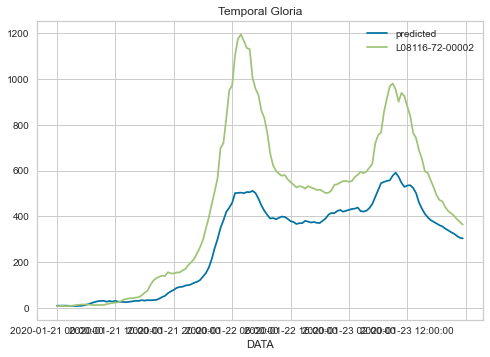

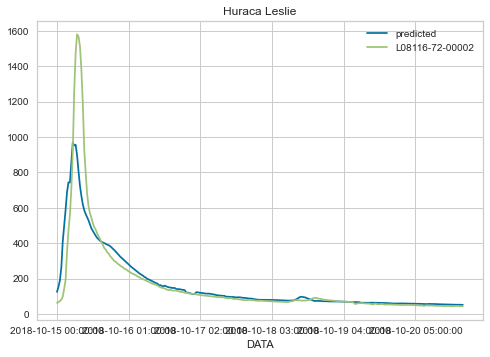

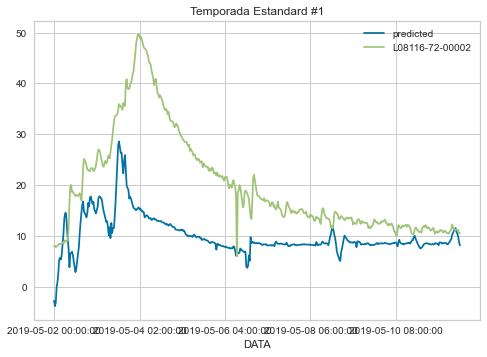

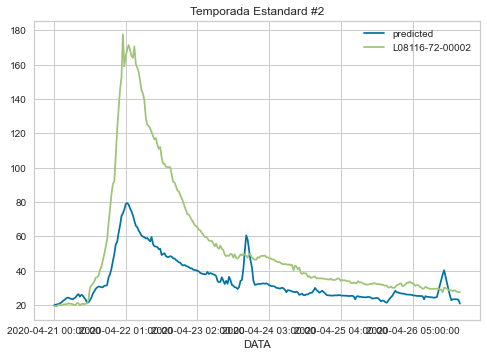

Time:  0:00:01.438590


In [135]:
df_results_altTer = randomForestAltTer(df_results_altTer, staticTest=False)
df_results_altTer = xgboostAltTer(df_results_altTer, staticTest=False)
df_results_altTer = lightgbmAltTer(df_results_altTer, staticTest=False)
df_results_altTer = catBoostAltTer(df_results_altTer, staticTest=False)
df_results_altTer = extraTreesAltTer(df_results_altTer, staticTest=False)
df_results_altTer = knnRegressorAltTer(df_results_altTer, staticTest=False)
df_results_altTer = linearRegressionAltTer(df_results_altTer, staticTest=False)

In [136]:
df_results_altTer

Method     Score Prediccio_Hores  RMSE Total  RMSE_Leslie  \
0       Random Forest  0.083037           1 day  277.855603   224.960133   
1       Random Forest   0.90523           1 day   36.460272    56.779954   
2       Random Forest  0.968313           1 day   30.946228    52.515937   
3             XGBoost  0.123078           1 day  271.721417   225.487143   
4             XGBoost  0.905216           1 day   36.462895    66.317962   
5             XGBoost   0.95886           1 day   35.261083    79.360683   
6            LightGBM      None           1 day  271.899126   220.412772   
7            LightGBM      None           1 day   36.642839    58.630740   
8            LightGBM      None           1 day   32.413759    53.305044   
9            CatBoost      None           1 day  270.159830   218.967343   
10           CatBoost      None           1 day   42.408617    59.809705   
11           CatBoost      None           1 day   36.276142    51.584027   
12        Extra Trees   0.10438           1 day  274.602915   223.350791   
13        Extra Trees  0.899943           1 day   37.463396    34.669768   
14        Extra Trees  0.977924           1 day   25.830135    34.057930   
15       KNNRegressor   0.16272           1 day  265.508568   217.495674   
16       KNNRegressor  0.903248           1 day   36.839537   105.143188   
17       KNNRegressor  0.914162           1 day   50.933565   107.099503   
18  Linear Regression  0.348498           1 day  234.207770   184.073151   
19  Linear Regression  0.606775           1 day   74.268544   118.412910   
20  Linear Regression   0.76153           1 day   84.894843   116.101096   

    RMSE_Standard1  RMSE_Standard2  RSME_Gloria  
0        70.083243       45.952266   424.404526  
1         7.014594       16.763133    44.726724  
2         7.262854       11.958510    58.247745  
3        61.108360       41.163716   416.141604  
4        10.659880       14.975315    62.505260  
5         8.575854       18.107646    50.451992  
6        54.916325       38.071177   417.420150  
7         9.664060       16.012545    49.500514  
8         5.401524       16.785130    54.142411  
9        36.200492       32.637664   416.241236  
10       25.367075       18.817004    64.474540  
11       11.908702       17.505295    71.238960  
12       67.474316       41.271473   416.791838  
13        6.784884       14.121784    39.398983  
14        7.582357       10.442048    44.498073  
15       55.952771       32.038406   398.149623  
16       11.019276       20.199176    70.114265  
17       10.236204       17.757366    80.372164  
18       41.315860       36.171434   309.764664  
19       10.016695       15.139895   139.066029  
20       12.756468       31.440213   236.392670

In [137]:
df_results_altTer.drop(columns=['Score','Prediccio_Hores'], inplace=True)
df_results_altTer.to_latex("Resultats/GridSearchManual/AltTer/AltTer-SMOGN-Dynamic.tex")
df_results_altTer.to_csv("Resultats/GridSearchManual/AltTer/AltTer-SMOGN-Dynamic.csv")

# Models Baix Ter

# Random Forest (Baix Ter)

In [74]:
def randomForestBaixTer(df_results_baixTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = { 
        'n_estimators': [50,100, 200], # Nombre de arbres
        'max_features': [1, 'sqrt', 'log2'], # Maxim features
        'max_depth' : [8,10,25,None] # Profunditat dels arbres
    }

    iteracio = 0
    *_, last = tscv.split(Df_BaixX)
    staticTest_index = last[1]

    iteracio = 0
    for train_index, test_index in tscv.split(Df_BaixX):
        iteracio += 1
        if staticTest == False:
            Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[test_index]
            Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[test_index]
        else:
            Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[staticTest_index]
            Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[staticTest_index]

        model = RandomForestRegressor()
        tscv = TimeSeriesSplit()
        gsearch = HalvingGridSearchCV(estimator=model, cv=tscv, param_grid=param_search, n_jobs=-1)
        print("Iteració: ", iteracio)
        gsearchfited = gsearch.fit(Df_BaixX_train, Df_Baixy_train)

        bestParams = gsearchfited.best_params_
        score = gsearchfited.score(Df_BaixX_test, Df_Baixy_test)
        FeatureImportance = gsearchfited.best_estimator_.feature_importances_

        predicty = gsearchfited.best_estimator_.predict(Df_BaixX_test)
        rmseScore = mean_squared_error(Df_Baixy_test, predicty, squared=False)

        nameh = Df_BaixX.columns[0]
        hores = "1 day"

        viz = FeatureImportances(gsearchfited.best_estimator_)
        viz.fit(Df_BaixX, Df_Baixy)
        viz.show()

        plotYtestAnomaly1 = dataPredictionsBaixY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsBaixY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsBaixY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsBaixY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsBaixX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsBaixX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsBaixX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsBaixX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = gsearchfited.best_estimator_.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = gsearchfited.best_estimator_.predict(plotXtestAnomaly2.values)
        predictStandard1 = gsearchfited.best_estimator_.predict(plotXtestStandard1.values)
        predictStandard2 = gsearchfited.best_estimator_.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'Random Forest','RMSE Total':rmseScore, 'Score':score,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_baixTer = df_results_baixTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()


    stop = timeit.default_timer()
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    
    return df_results_baixTer

# XGBoost (Baix Ter)

In [75]:
def xgboostBaixTer(df_results_baixTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = { 
        'n_estimators': [50,100, 200], # Nombre de arbres
        'max_features': [1, 'sqrt', 'log2'], # Maxim features
        'max_depth' : [8,10,25,None] # Profunditat dels arbres
    }

    iteracio = 0
    for train_index, test_index in tscv.split(Df_BaixX):
        iteracio += 1
        Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[test_index]
        Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[test_index]

        model = xgb.XGBRegressor()
        tscv = TimeSeriesSplit()
        gsearch = HalvingGridSearchCV(estimator=model, cv=tscv, param_grid=param_search, n_jobs=-1)
        print("Iteració: ", iteracio)
        gsearchfited = gsearch.fit(Df_BaixX_train, Df_Baixy_train)

        bestParams = gsearchfited.best_params_
        score = gsearchfited.score(Df_BaixX_test, Df_Baixy_test)
        FeatureImportance = gsearchfited.best_estimator_.feature_importances_

        predicty = gsearchfited.best_estimator_.predict(Df_BaixX_test)
        rmseScore = mean_squared_error(Df_Baixy_test, predicty, squared=False)

        nameh = Df_BaixX.columns[0]
        hores = "1 day"


        viz = FeatureImportances(gsearchfited.best_estimator_)
        viz.fit(Df_BaixX, Df_Baixy)
        viz.show()

        plotYtestAnomaly1 = dataPredictionsBaixY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsBaixY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsBaixY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsBaixY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsBaixX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsBaixX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsBaixX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsBaixX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = gsearchfited.best_estimator_.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = gsearchfited.best_estimator_.predict(plotXtestAnomaly2.values)
        predictStandard1 = gsearchfited.best_estimator_.predict(plotXtestStandard1.values)
        predictStandard2 = gsearchfited.best_estimator_.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'XGBoost','RMSE Total':rmseScore,'Score':score,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_baixTer = df_results_baixTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()



        stop = timeit.default_timer()
        print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    
    return df_results_baixTer

## LightGBM (Baix Ter)

In [76]:
def lightgbmBaixTer(df_results_baixTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = {
                            "objective": "regression",
                            "metric": "rmse",
                            "verbosity": -1,
                            "boosting_type": "gbdt",
                            "seed": 42,
                            'linear_tree': False,
                            'learning_rate': .15,
                            'min_child_samples': 5,
                            'num_leaves': 31,
                            'num_iterations': 50
                        }

    #Calcular només amb els valors on plou


    iteracio = 0
    *_, last = tscv.split(Df_BaixX)
    staticTest_index = last[1]

    iteracio = 0
    for train_index, test_index in tscv.split(Df_BaixX):
        iteracio += 1
        if staticTest == False:
            Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[test_index]
            Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[test_index]
        else:
            Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[staticTest_index]
            Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[staticTest_index]
    
        print(Df_BaixX.iloc[test_index].index[0])

        model = lgb.LGBMRegressor(first_metric_only = True, **param_search)

        model.fit(Df_BaixX_train, Df_Baixy_train,
              eval_metric = 'l1', 
              eval_set = [(Df_BaixX_test, Df_Baixy_test)],
              #early_stopping_rounds = 10,
              verbose = 0)
        predicty = model.predict(Df_BaixX_test)
        rmseScore = mean_squared_error(Df_Baixy_test, predicty, squared=False)

        nameh = Df_BaixX.columns[0]
        hores = "1 day"



        #joblib.dump(gsearchfited.best_estimator_, 'resultsDf/pickle/partBaixa/XGBoost_'+str(df_results_BaixTer.index[-1])+'.pkl', compress = 1)

        #viz = FeatureImportances(gsearchfited.best_estimator_)
        #viz.fit(Df_BaixX, Df_Baixy)
        #viz.show()

        plotYtestAnomaly1 = dataPredictionsBaixY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsBaixY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsBaixY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsBaixY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsBaixX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsBaixX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsBaixX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsBaixX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = model.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = model.predict(plotXtestAnomaly2.values)
        predictStandard1 = model.predict(plotXtestStandard1.values)
        predictStandard2 = model.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'LightGBM','RMSE Total':rmseScore,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_baixTer = df_results_baixTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()


    stop = timeit.default_timer()
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    
    return df_results_baixTer

# CatBoost (Baix Ter)

In [77]:
def catBoostBaixTer(df_results_baixTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = {
        'n_estimators': 2000,
        'max_depth': 4,
        'num_leaves': 2**4,
        'learning_rate': 0.1,
        'boosting_type': 'dart'
    }


    iteracio = 0
    *_, last = tscv.split(Df_BaixX)
    staticTest_index = last[1]

    iteracio = 0
    for train_index, test_index in tscv.split(Df_BaixX):
        iteracio += 1
        if staticTest == False:
            Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[test_index]
            Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[test_index]
        else:
            Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[staticTest_index]
            Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[staticTest_index]
    
        model = CatBoostRegressor(loss_function='RMSE', depth=3, learning_rate=0.4, iterations=1000, 
        random_seed=18, 
        od_type='Iter',
        od_wait=20)

        model.fit(Df_BaixX_train, Df_Baixy_train,
              use_best_model=True, 
              eval_set = (Df_BaixX_test, Df_Baixy_test),
              #early_stopping_rounds = 10,
              verbose = 0,
            plot=True)
        predicty = model.predict(Df_BaixX_test)
        rmseScore = mean_squared_error(Df_Baixy_test, predicty, squared=False)

        nameh = Df_BaixX.columns[0]
        hores = "1 day"



        #joblib.dump(gsearchfited.best_estimator_, 'resultsDf/pickle/partBaixa/XGBoost_'+str(df_results_BaixTer.index[-1])+'.pkl', compress = 1)

        #viz = FeatureImportances(gsearchfited.best_estimator_)
        #viz.fit(Df_BaixX, Df_Baixy)
        #viz.show()

        plotYtestAnomaly1 = dataPredictionsBaixY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsBaixY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsBaixY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsBaixY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsBaixX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsBaixX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsBaixX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsBaixX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = model.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = model.predict(plotXtestAnomaly2.values)
        predictStandard1 = model.predict(plotXtestStandard1.values)
        predictStandard2 = model.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'CatBoost','RMSE Total':rmseScore,'Score':None,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_BaixTer = df_results_baixTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()


    stop = timeit.default_timer()
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    
    return df_results_baixTer

# ExtraTrees (Baix Ter)

In [78]:
def extraTreesBaixTer(df_results_baixTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = { 
        'n_estimators': [50,100, 200], # Nombre de arbres
        'max_features': [1, 'sqrt', 'log2'], # Maxim features
        'max_depth' : [8,10,25,None] # Profunditat dels arbres
    }

    iteracio = 0
    *_, last = tscv.split(Df_BaixX)
    staticTest_index = last[1]

    iteracio = 0
    for train_index, test_index in tscv.split(Df_BaixX):
        iteracio += 1
        if staticTest == False:
            Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[test_index]
            Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[test_index]
        else:
            Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[staticTest_index]
            Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[staticTest_index]

        model = ExtraTreesRegressor()
        tscv = TimeSeriesSplit()
        gsearch = HalvingGridSearchCV(estimator=model, cv=tscv, param_grid=param_search, n_jobs=-1)
        print("Iteració: ", iteracio)
        gsearchfited = gsearch.fit(Df_BaixX_train, Df_Baixy_train)

        bestParams = gsearchfited.best_params_
        score = gsearchfited.score(Df_BaixX_test, Df_Baixy_test)
        FeatureImportance = gsearchfited.best_estimator_.feature_importances_

        predicty = gsearchfited.best_estimator_.predict(Df_BaixX_test)
        rmseScore = mean_squared_error(Df_Baixy_test, predicty, squared=False)

        nameh = Df_BaixX.columns[0]
        hores = "1 day"




        viz = FeatureImportances(gsearchfited.best_estimator_)
        viz.fit(Df_BaixX, Df_Baixy)
        viz.show()

        plotYtestAnomaly1 = dataPredictionsBaixY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsBaixY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsBaixY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsBaixY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsBaixX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsBaixX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsBaixX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsBaixX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = gsearchfited.best_estimator_.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = gsearchfited.best_estimator_.predict(plotXtestAnomaly2.values)
        predictStandard1 = gsearchfited.best_estimator_.predict(plotXtestStandard1.values)
        predictStandard2 = gsearchfited.best_estimator_.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'Extra Trees','RMSE Total':rmseScore, 'Score':score,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_BaixTer = df_results_BaixTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()
    return df_results_baixTer

# KNNRegressor (Baix Ter)

In [79]:
def knnregressorBaixTer(df_results_baixTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = { 
        'n_neighbors': [1, 3, 5, 10, 20], # Nombre de neighbors
        'leaf_size': [20, 30, 50], # Mida fulles
        'weights': ['uniform','distance']
    }

    iteracio = 0
    *_, last = tscv.split(Df_BaixX)
    staticTest_index = last[1]

    iteracio = 0
    for train_index, test_index in tscv.split(Df_BaixX):
        iteracio += 1
        if staticTest == False:
            Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[test_index]
            Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[test_index]
        else:
            Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[staticTest_index]
            Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[staticTest_index]

        model = KNeighborsRegressor()
        tscv = TimeSeriesSplit()
        gsearch = HalvingGridSearchCV(estimator=model, cv=tscv, param_grid=param_search, n_jobs=-1)
        print("Iteració: ", iteracio)
        gsearchfited = gsearch.fit(Df_BaixX_train, Df_Baixy_train)

        bestParams = gsearchfited.best_params_
        score = gsearchfited.score(Df_BaixX_test, Df_Baixy_test)

        predicty = gsearchfited.best_estimator_.predict(Df_BaixX_test)
        rmseScore = mean_squared_error(Df_Baixy_test, predicty, squared=False)

        nameh = Df_BaixX.columns[0]
        hores = "1 day"


        plotYtestAnomaly1 = dataPredictionsBaixY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsBaixY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsBaixY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsBaixY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsBaixX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsBaixX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsBaixX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsBaixX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = gsearchfited.best_estimator_.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = gsearchfited.best_estimator_.predict(plotXtestAnomaly2.values)
        predictStandard1 = gsearchfited.best_estimator_.predict(plotXtestStandard1.values)
        predictStandard2 = gsearchfited.best_estimator_.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'KNNRegressor','RMSE Total':rmseScore, 'Score':score,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_baixTer = df_results_baixTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()

    
    stop = timeit.default_timer()
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    return df_results_baixTer

# Linear Regression (Baix Ter)

In [80]:
def linearRegressionBaixTer(df_results_baixTer, staticTest=False):
    start = timeit.default_timer()

    tscv = TimeSeriesSplit(n_splits=3)
    param_search = { 
        'n_estimators': [50,100, 200], # Nombre de arbres
        'max_features': [1, 'sqrt', 'log2'], # Maxim features
        'max_depth' : [8,10,25,None] # Profunditat dels arbres
    }

    iteracio = 0
    *_, last = tscv.split(Df_BaixX)
    staticTest_index = last[1]

    for train_index, test_index in tscv.split(Df_BaixX):
        iteracio += 1
        if staticTest == False:
            Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[test_index]
            Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[test_index]
        else:
            Df_BaixX_train, Df_BaixX_test = Df_BaixX.values[train_index], Df_BaixX.values[staticTest_index]
            Df_Baixy_train, Df_Baixy_test = Df_Baixy.values.ravel()[train_index], Df_Baixy.values.ravel()[staticTest_index]

        model = LinearRegression()
        print("Iteració: ", iteracio)
        modelfited = model.fit(Df_BaixX_train, Df_Baixy_train)

        score = modelfited.score(Df_BaixX_test, Df_Baixy_test)

        predicty = modelfited.predict(Df_BaixX_test)
        rmseScore = mean_squared_error(Df_Baixy_test, predicty, squared=False)


        hores = "1 day"

        plotYtestAnomaly1 = dataPredictionsBaixY["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotYtestAnomaly2 = dataPredictionsBaixY["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotYtestStandard1 = dataPredictionsBaixY["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotYtestStandard2 = dataPredictionsBaixY["2020-04-20 5:00:00":"2020-04-26 21:30:00"]

        plotXtestAnomaly1 = dataPredictionsBaixX["2020-01-20 5:00:00":"2020-01-23 21:30:00"]
        plotXtestAnomaly2 = dataPredictionsBaixX["2018-10-14 5:00:00":"2018-10-20 21:30:00"]
        plotXtestStandard1 = dataPredictionsBaixX["2019-05-01 5:00:00":"2019-05-11 21:30:00"]
        plotXtestStandard2 = dataPredictionsBaixX["2020-04-20 5:00:00":"2020-04-26 21:30:00"]



        predictAnomaly1 = modelfited.predict(plotXtestAnomaly1.values)
        predictAnomaly2 = modelfited.predict(plotXtestAnomaly2.values)
        predictStandard1 = modelfited.predict(plotXtestStandard1.values)
        predictStandard2 = modelfited.predict(plotXtestStandard2.values)

        rmseScoreAnomaly1 = mean_squared_error(plotYtestAnomaly1, predictAnomaly1, squared=False)
        rmseScoreAnomaly2 = mean_squared_error(plotYtestAnomaly2, predictAnomaly2, squared=False)
        rmseScoreStandard1 = mean_squared_error(plotYtestStandard1, predictStandard1, squared=False)
        rmseScoreStandard2 = mean_squared_error(plotYtestStandard2, predictStandard2, squared=False)

        plotYtestAnomaly1.insert(0, 'predicted', predictAnomaly1, allow_duplicates=True)
        plotYtestAnomaly2.insert(0, 'predicted', predictAnomaly2, allow_duplicates=True)
        plotYtestStandard1.insert(0, 'predicted', predictStandard1, allow_duplicates=True)
        plotYtestStandard2.insert(0, 'predicted', predictStandard2, allow_duplicates=True)

        new_row = {'Method':'Linear Regression','RMSE Total':rmseScore,'Score':score,"Prediccio_Hores":hores,
                  'RSME_Gloria':rmseScoreAnomaly1, 'RMSE_Leslie':rmseScoreAnomaly2,'RMSE_Standard1':rmseScoreStandard1,'RMSE_Standard2':rmseScoreStandard2}
        df_results_baixTer = df_results_baixTer.append(new_row, ignore_index=True)

        plotYtestAnomaly1.plot(title="Temporal Gloria")
        plotYtestAnomaly2.plot(title="Huraca Leslie")
        plotYtestStandard1.plot(title="Temporada Estandard #1")
        plotYtestStandard2.plot(title="Temporada Estandard #2")
        plt.show()


    
    stop = timeit.default_timer()
    print("Time: ", str(datetime.timedelta(seconds=(stop-start))))
    return df_results_baixTer

In [139]:
df_results_baixTer = pd.DataFrame(columns = ["Method","Score","RMSE_Score","Prediccio_Hores"])

Iteració:  1


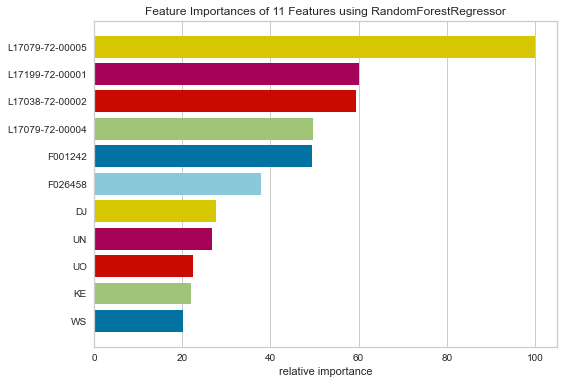

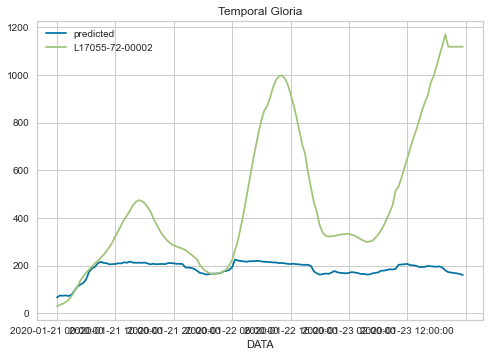

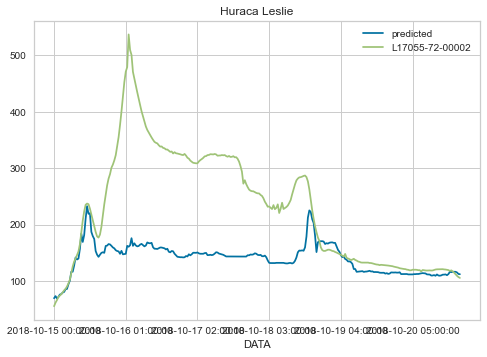

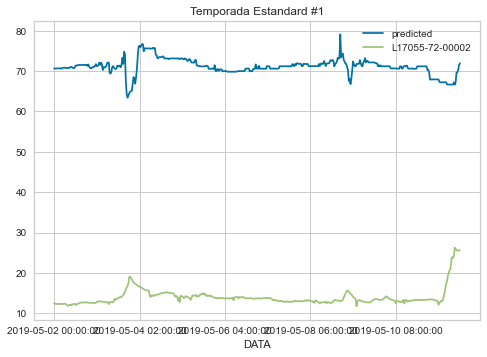

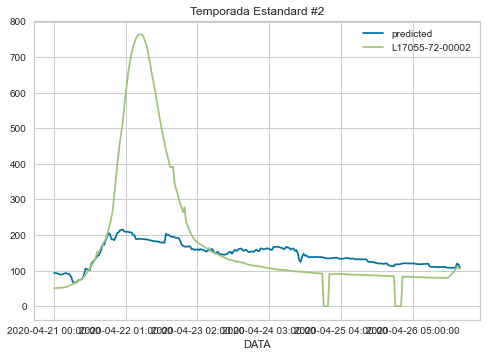

Iteració:  2


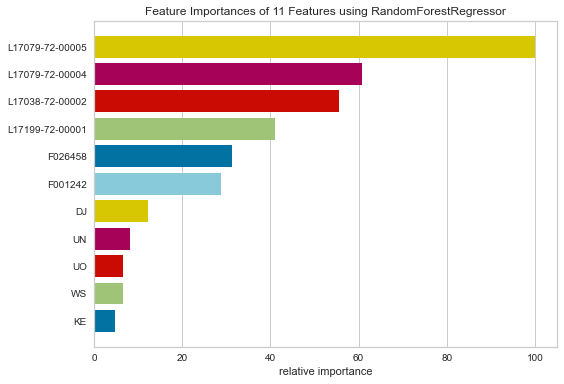

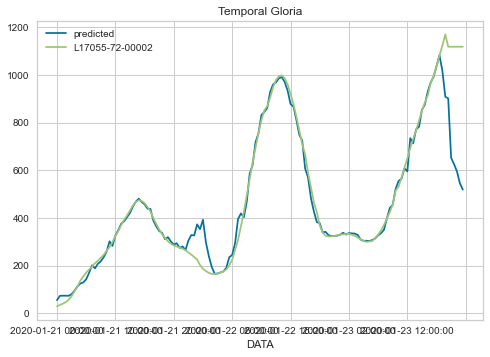

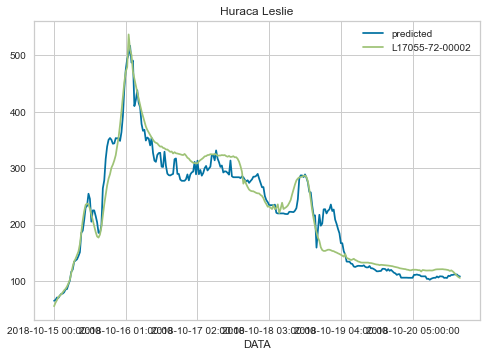

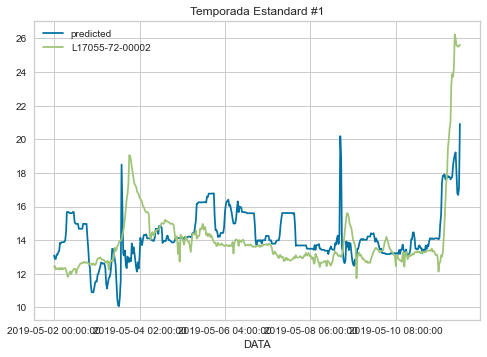

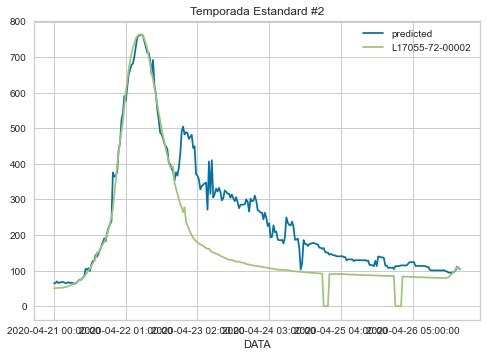

Iteració:  3


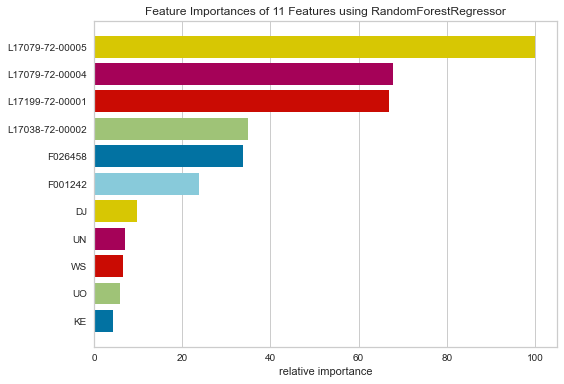

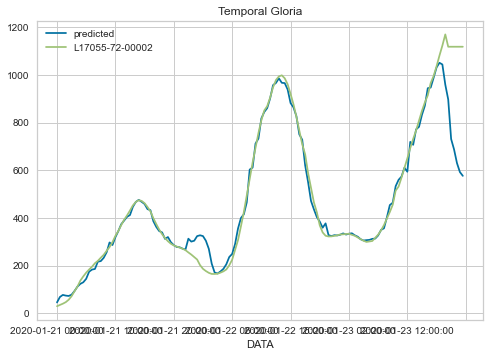

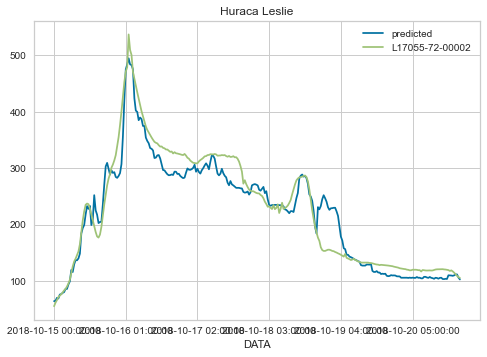

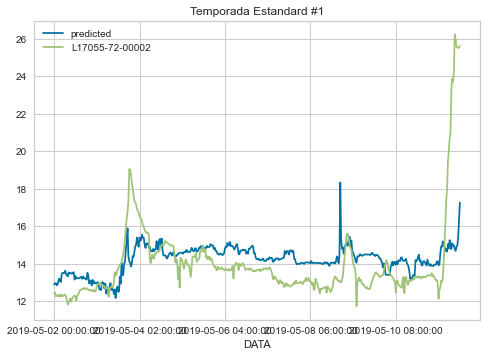

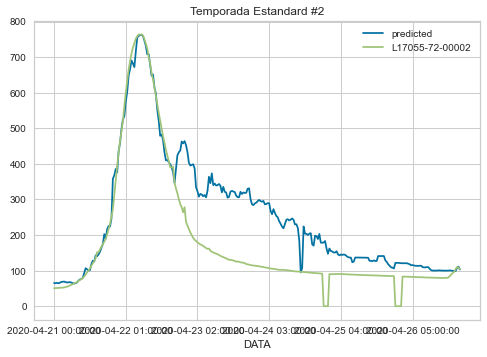

Time:  0:00:19.638044
Iteració:  1
[20:58:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




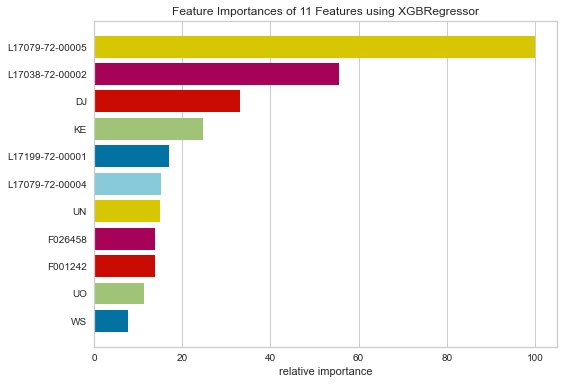

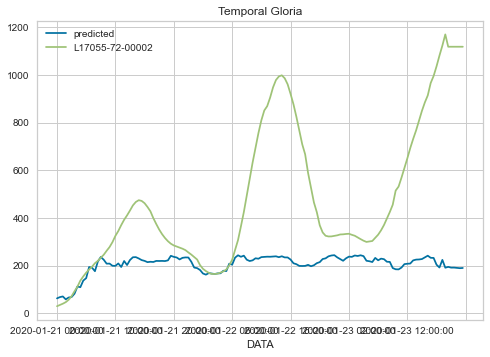

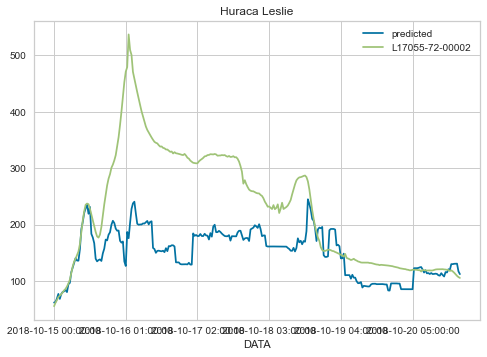

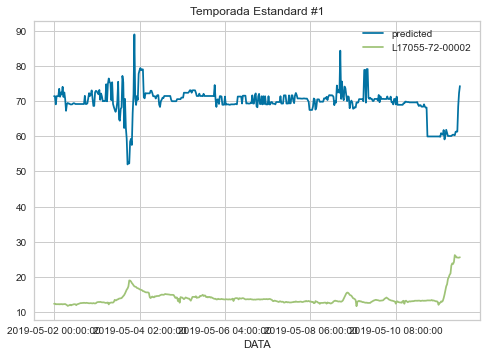

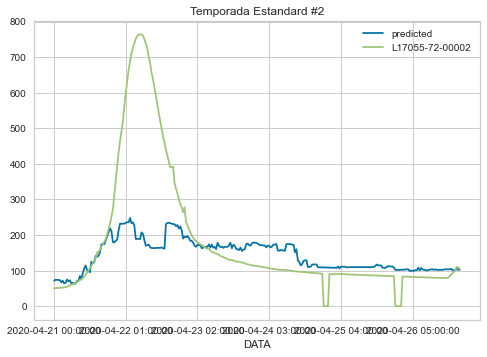

Time:  0:00:02.829508
Iteració:  2
[20:58:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




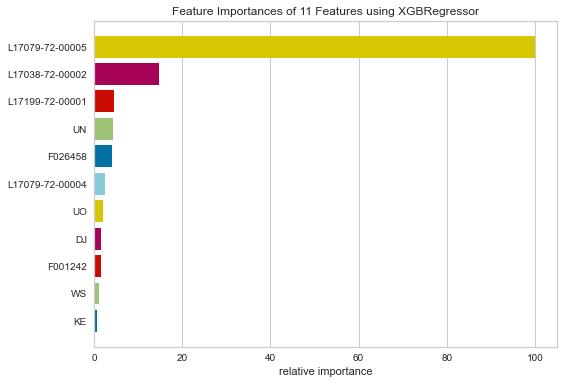

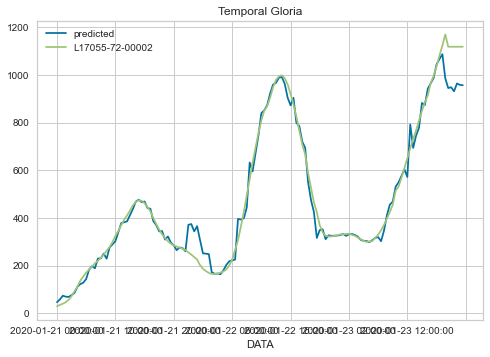

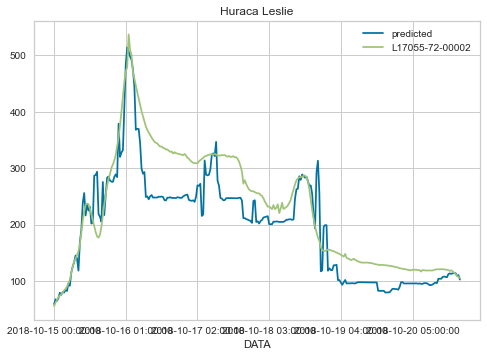

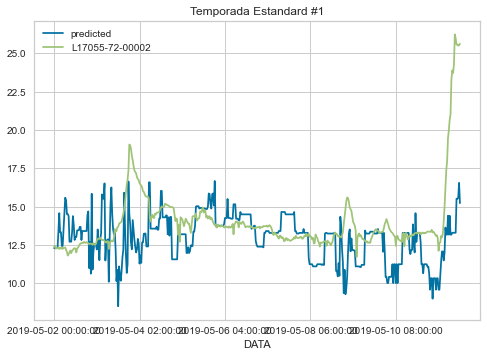

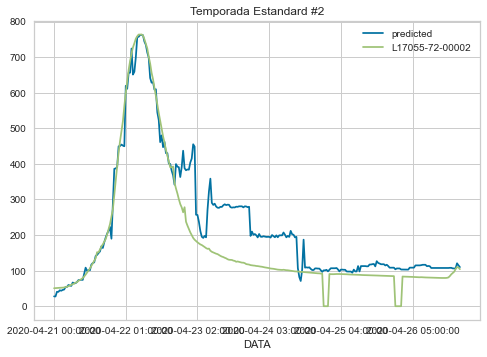

Time:  0:00:06.617247
Iteració:  3
[20:58:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




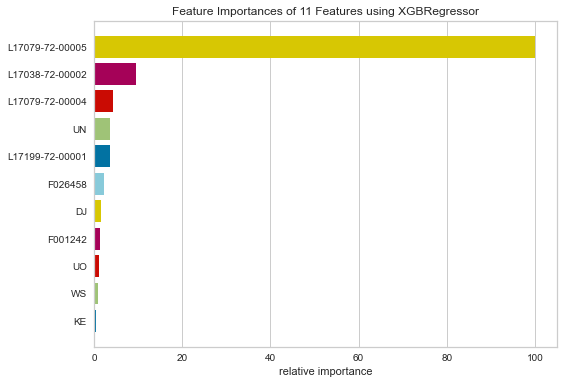

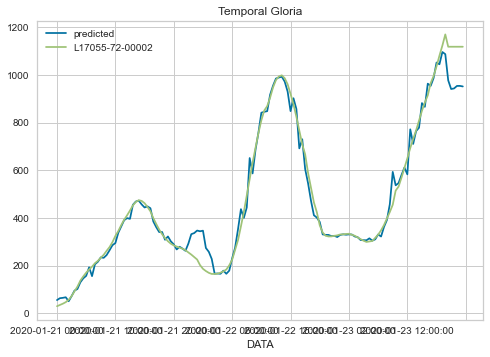

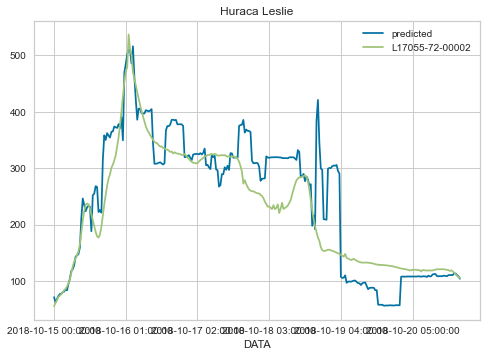

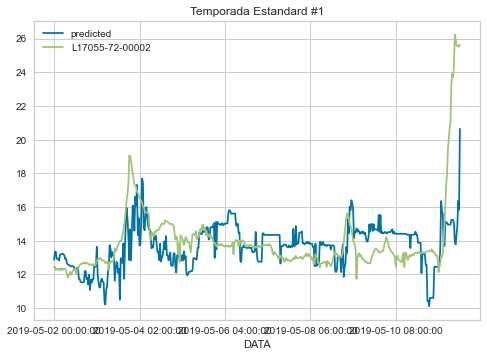

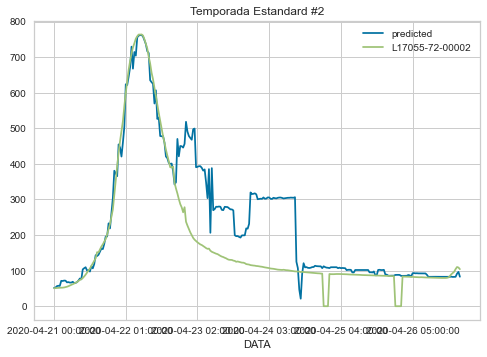

Time:  0:00:15.209394
Iteració:  1


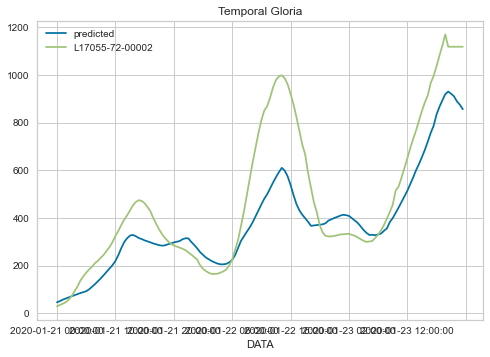

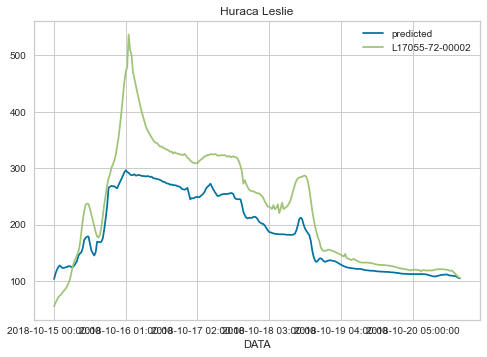

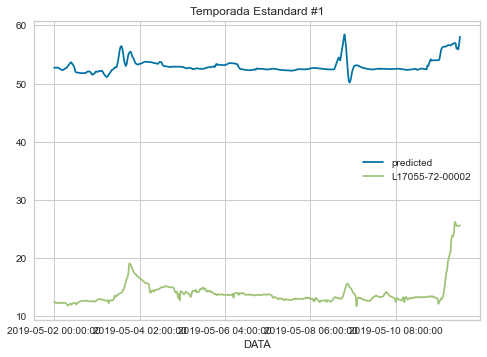

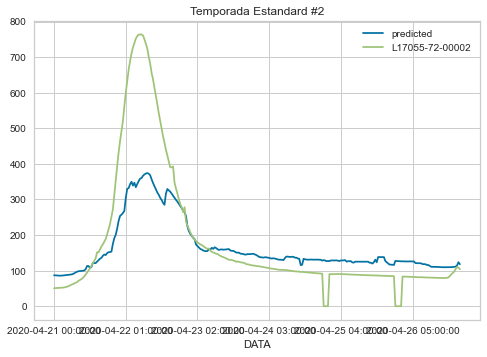

Iteració:  2


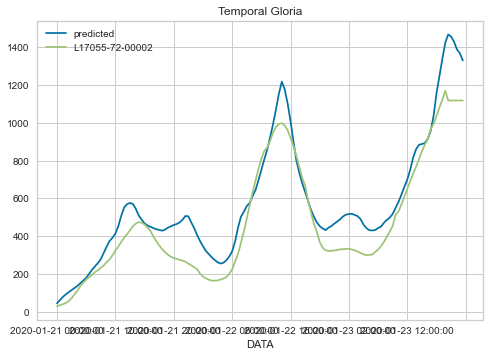

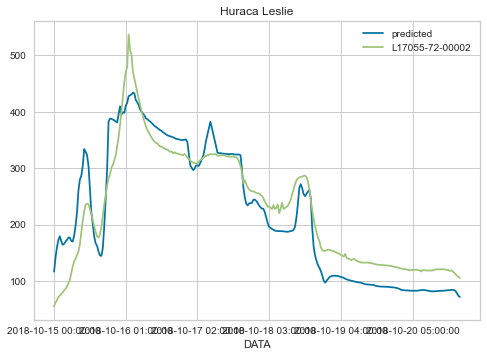

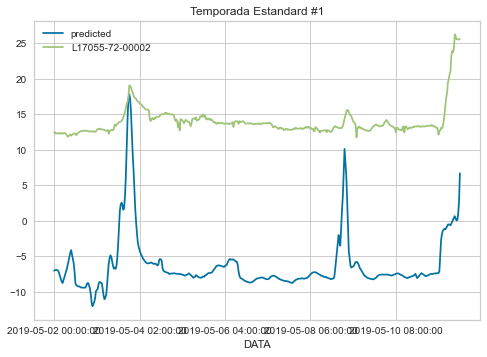

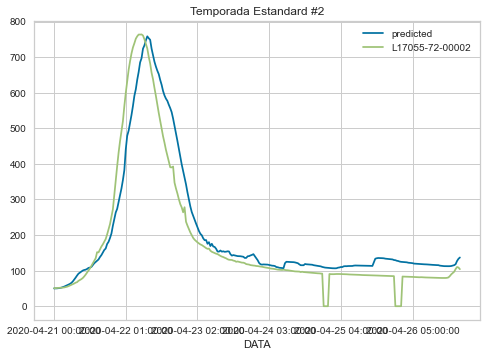

Iteració:  3


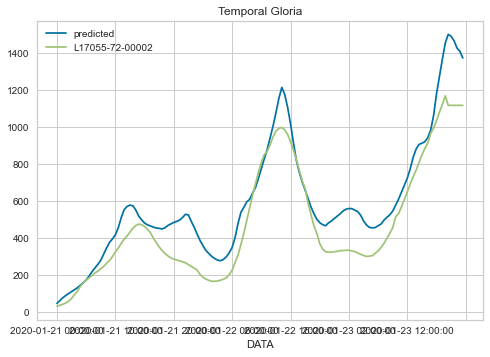

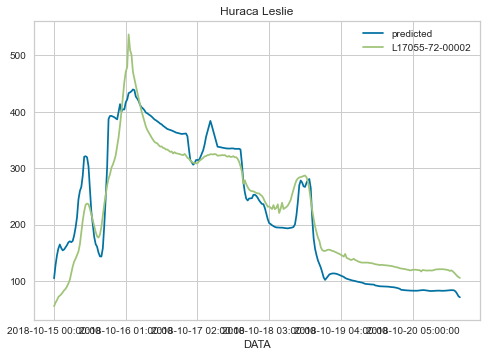

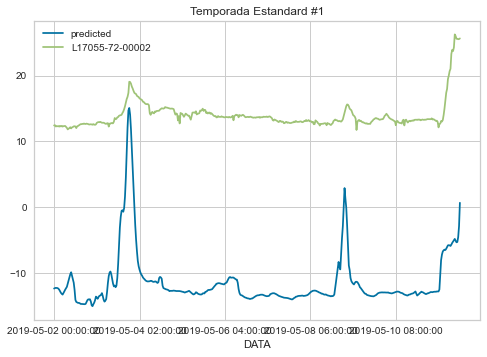

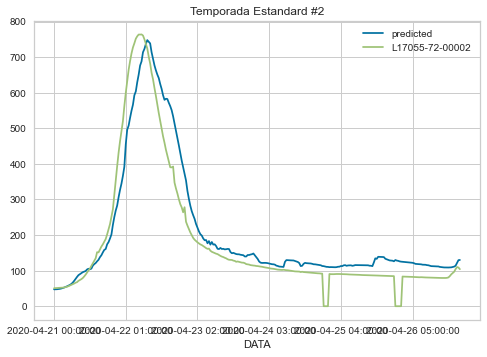

Time:  0:00:01.144122
1861


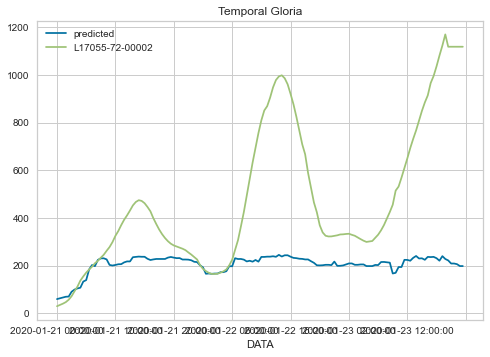

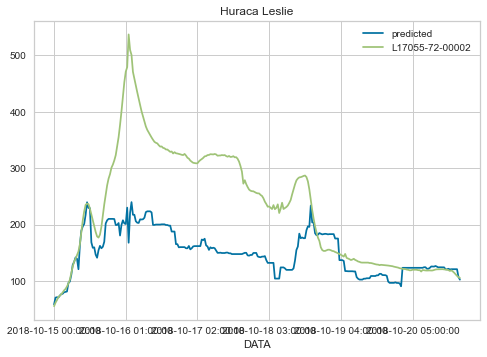

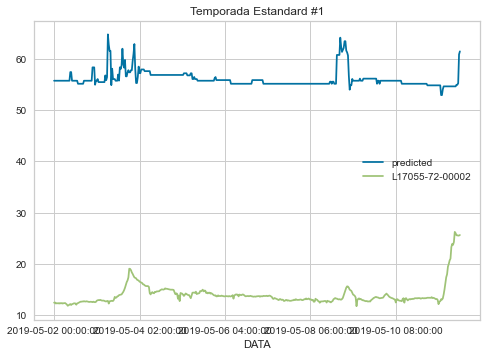

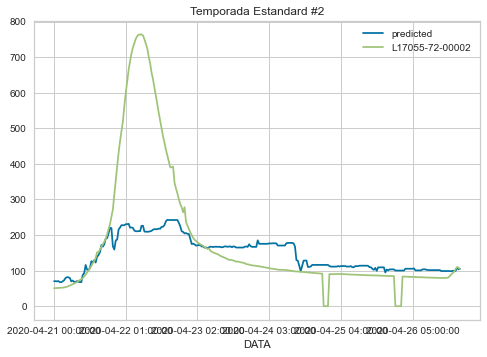

3721


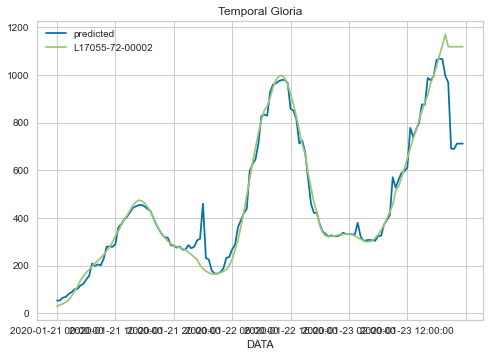

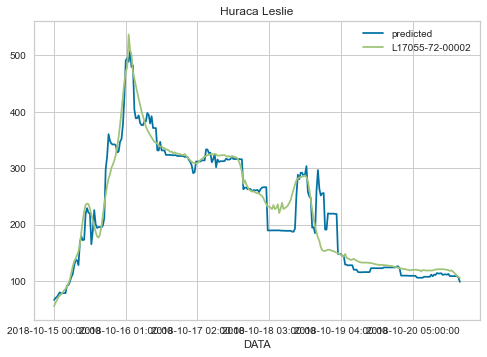

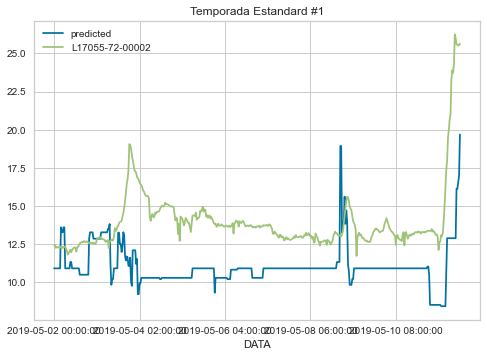

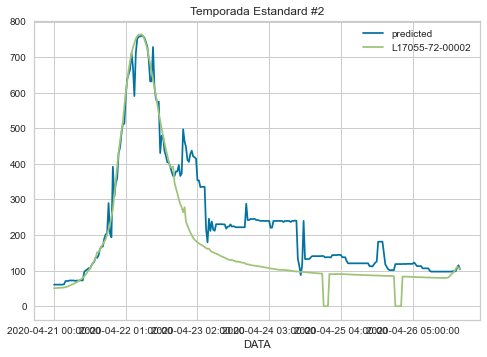

5581


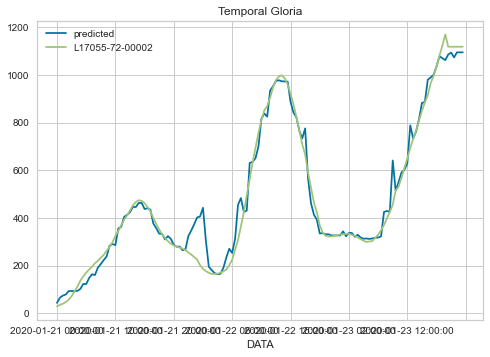

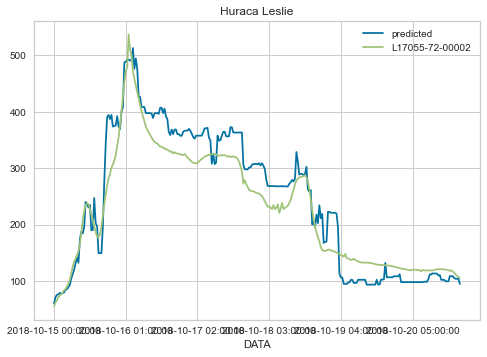

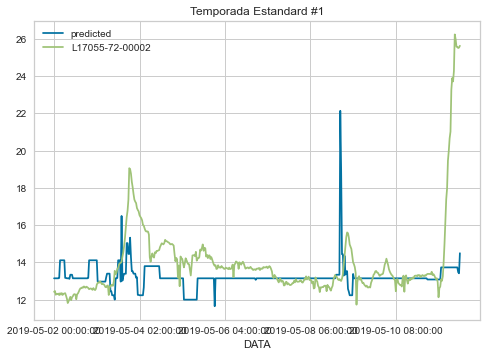

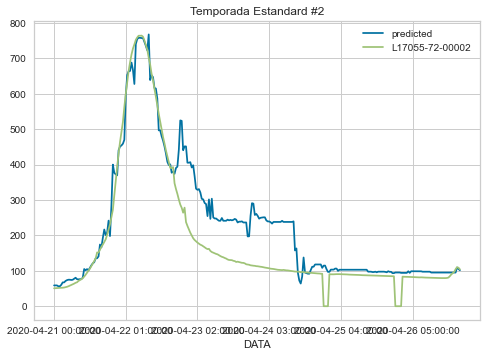

Time:  0:00:01.321183


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

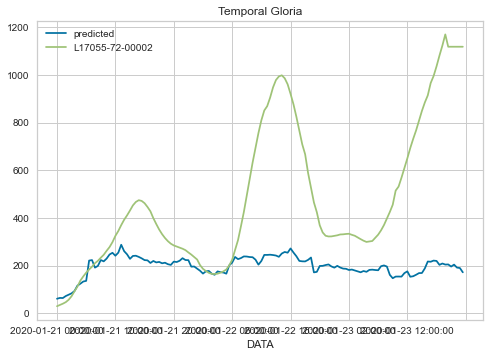

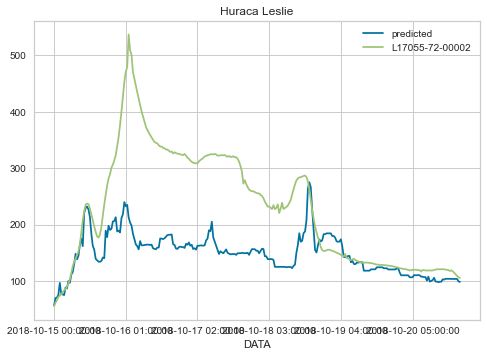

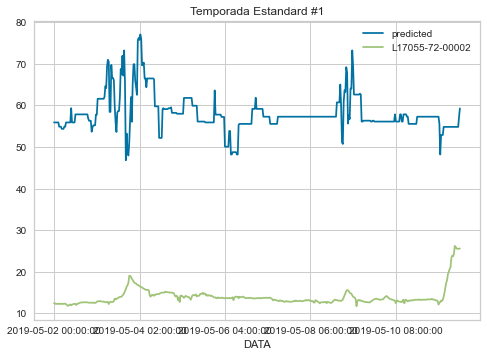

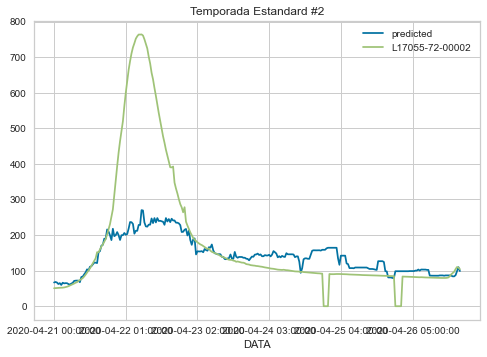

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

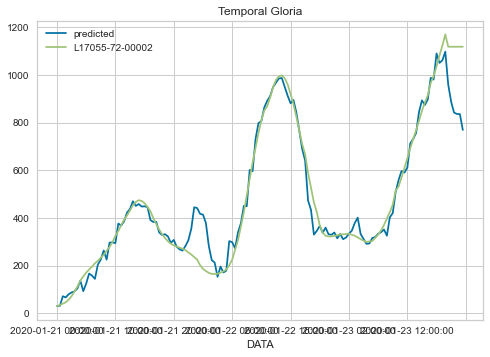

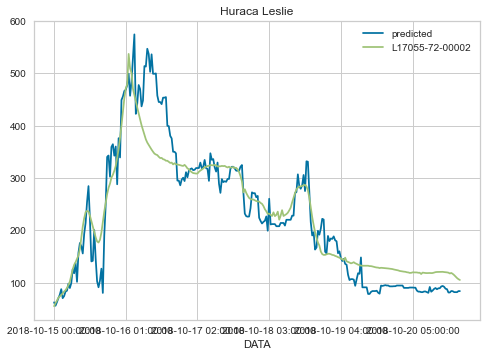

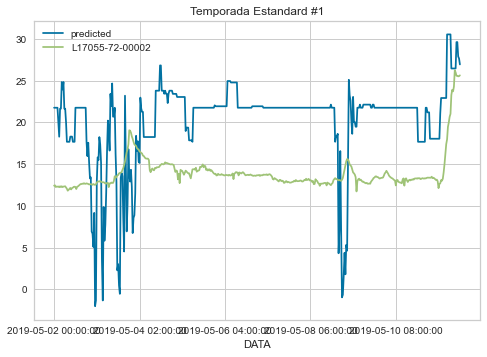

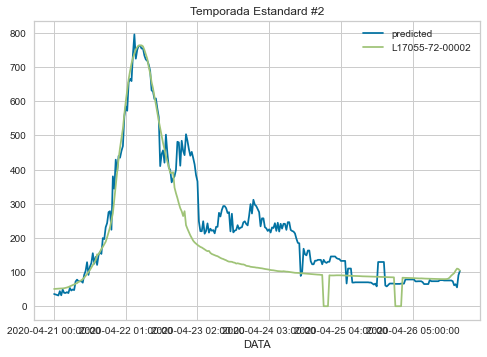

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

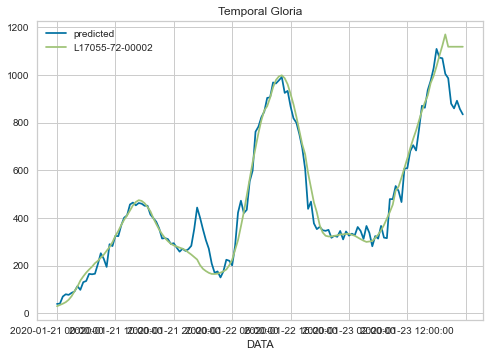

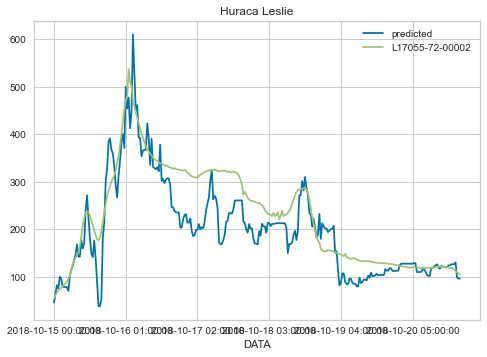

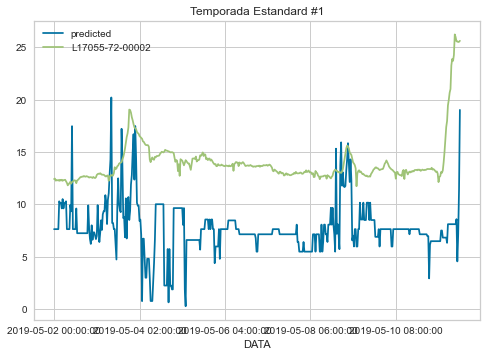

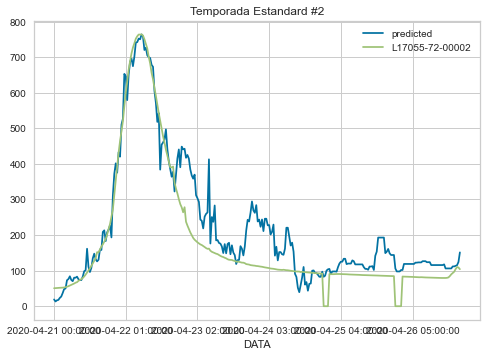

Time:  0:00:02.945033
Iteració:  1


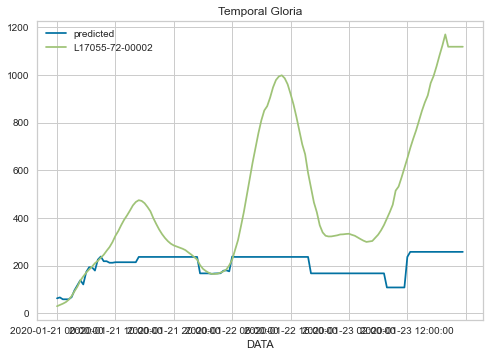

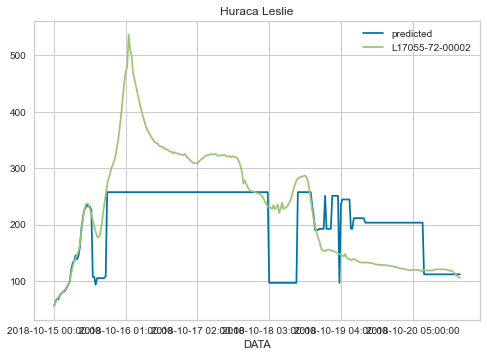

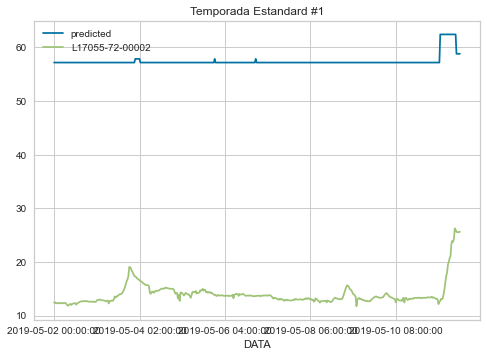

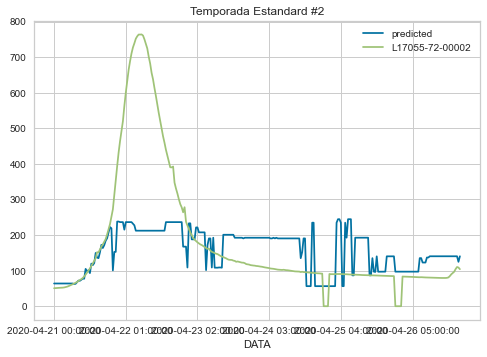

Iteració:  2


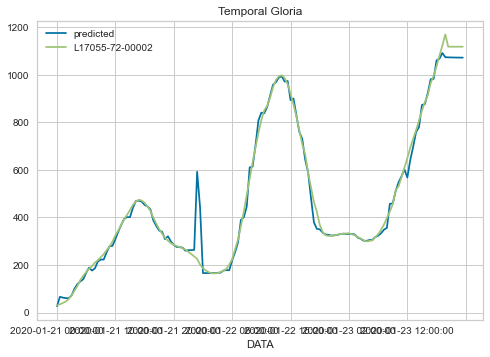

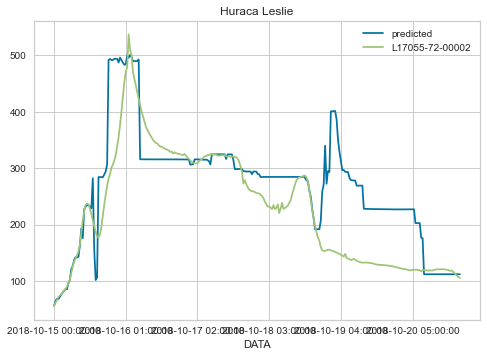

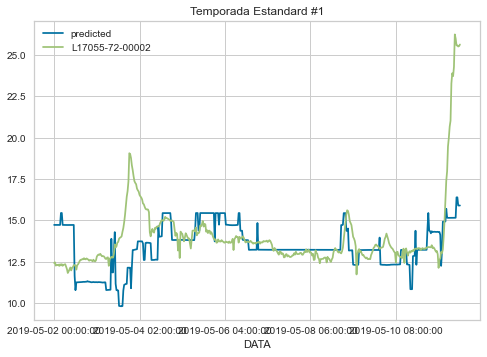

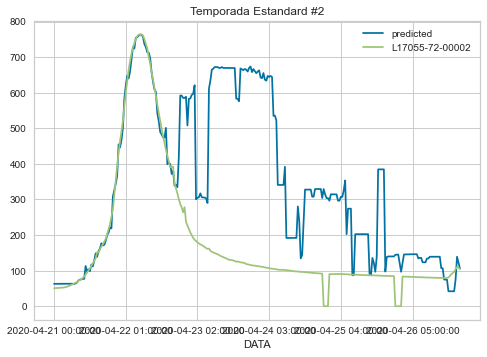

Iteració:  3


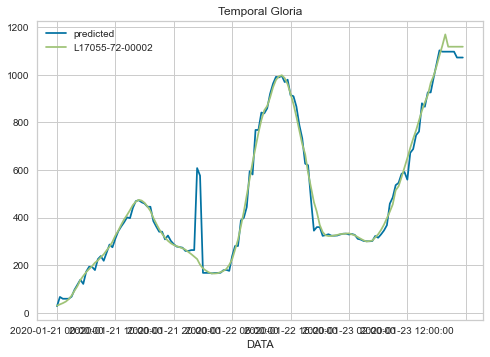

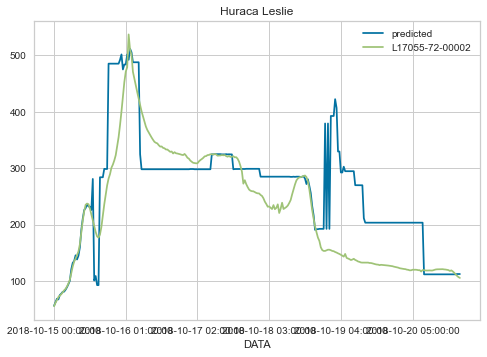

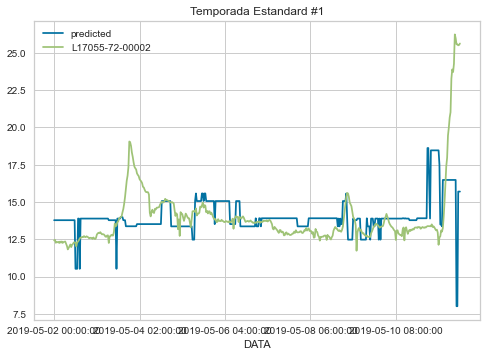

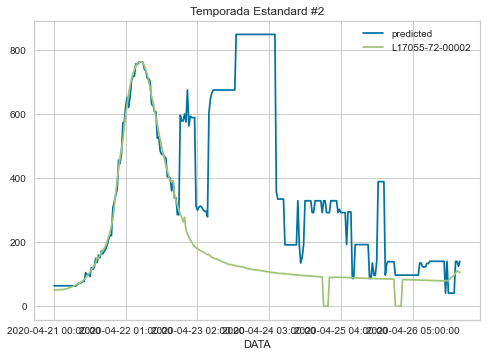

Time:  0:00:01.954088
Iteració:  1


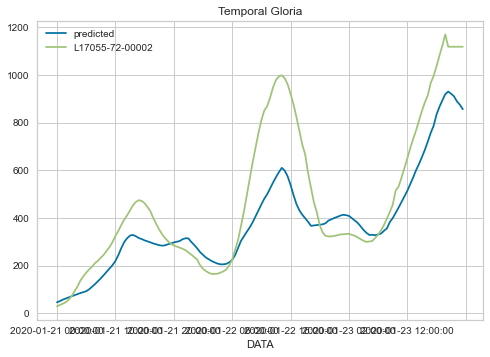

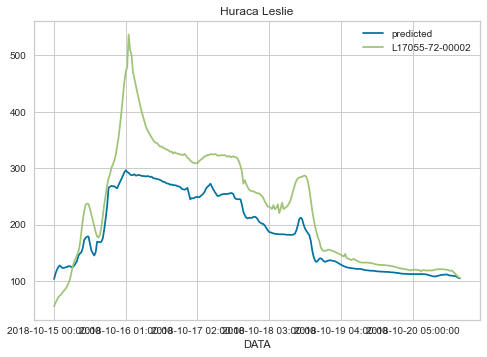

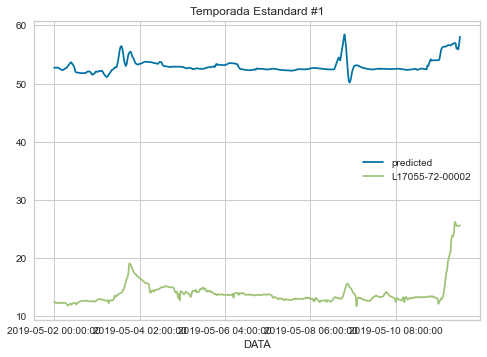

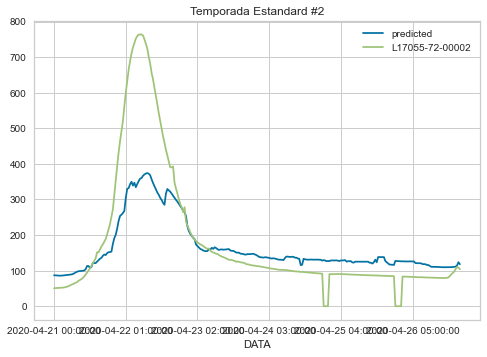

Iteració:  2


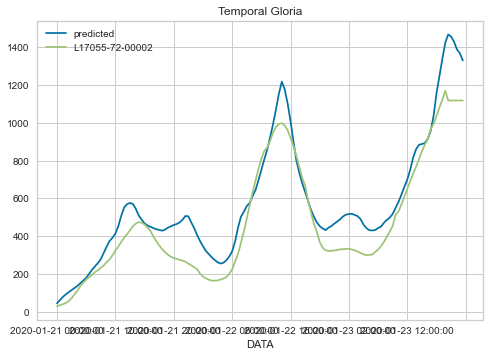

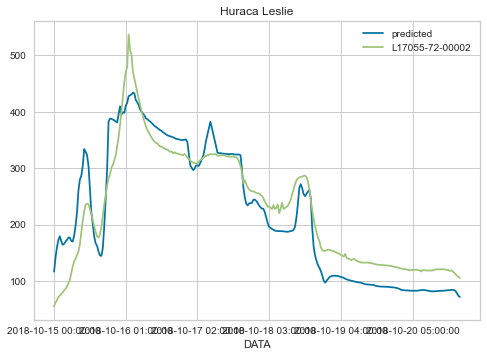

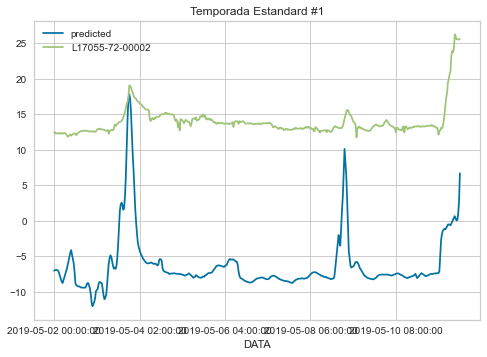

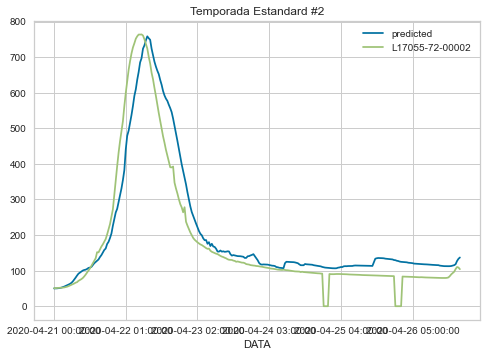

Iteració:  3


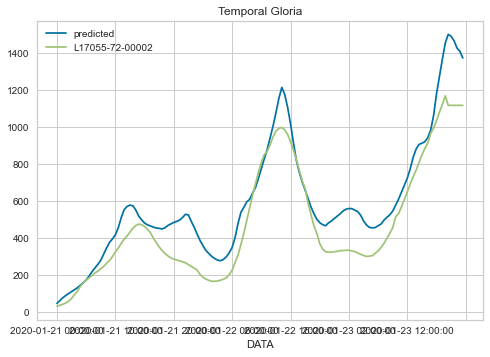

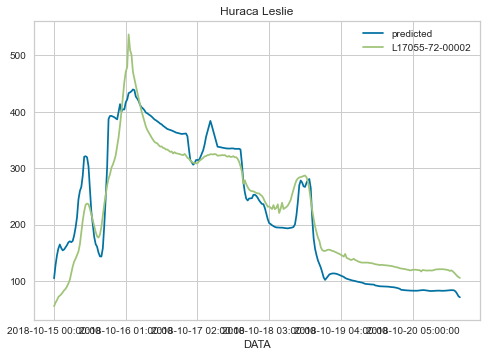

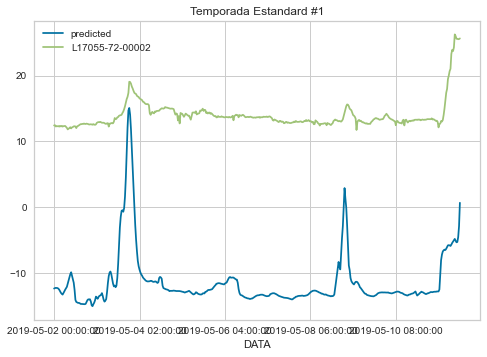

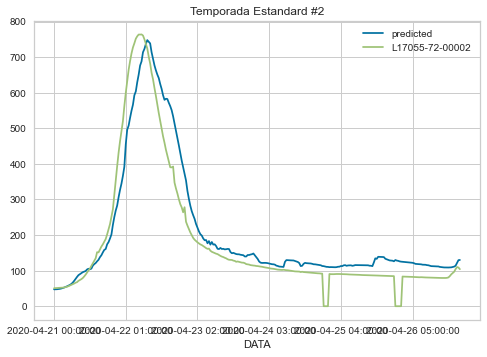

Time:  0:00:01.308873


In [140]:
df_results_baixTer = randomForestBaixTer(df_results_baixTer, staticTest=False)
df_results_baixTer = xgboostBaixTer(df_results_baixTer, staticTest=False)
df_results_baixTer = linearRegressionBaixTer(df_results_baixTer, staticTest=False)
df_results_baixTer = lightgbmBaixTer(df_results_baixTer, staticTest=False)
df_results_baixTer = catBoostBaixTer(df_results_baixTer, staticTest=False)
df_results_baixTer = knnregressorBaixTer(df_results_baixTer, staticTest=False)
df_results_baixTer = linearRegressionBaixTer(df_results_baixTer, staticTest=False)

In [141]:
df_results_baixTer

Method     Score RMSE_Score Prediccio_Hores  RMSE Total  \
0       Random Forest  0.061337        NaN           1 day  266.854122   
1       Random Forest   0.95578        NaN           1 day   28.417861   
2       Random Forest  0.982772        NaN           1 day   23.666353   
3             XGBoost  0.170849        NaN           1 day  250.804818   
4             XGBoost  0.950003        NaN           1 day   30.217098   
5             XGBoost  0.980452        NaN           1 day   25.209671   
6   Linear Regression  0.507072        NaN           1 day  193.379645   
7   Linear Regression  0.722965        NaN           1 day   71.129226   
8   Linear Regression  0.878266        NaN           1 day   62.910071   
9            LightGBM       NaN        NaN           1 day  251.958914   
10           LightGBM       NaN        NaN           1 day   28.695541   
11           LightGBM       NaN        NaN           1 day   26.074668   
12       KNNRegressor  0.145046        NaN           1 day  254.677441   
13       KNNRegressor  0.939797        NaN           1 day   33.158112   
14       KNNRegressor  0.980808        NaN           1 day   24.978827   
15  Linear Regression  0.507072        NaN           1 day  193.379645   
16  Linear Regression  0.722965        NaN           1 day   71.129226   
17  Linear Regression  0.878266        NaN           1 day   62.910071   

    RMSE_Leslie  RMSE_Standard1  RMSE_Standard2  RSME_Gloria  
0    125.027233       57.281474      165.096129   410.251025  
1     25.185083        2.046382       99.741906   110.857745  
2     29.301259        1.940274      104.268014    98.991317  
3    110.517197       55.982861      161.819002   396.070263  
4     50.036224        2.574999       74.449174    51.923169  
5     57.128300        2.054390      102.479585    51.506695  
6     60.586127       39.105620      116.269869   166.865796  
7     43.545711       20.471142       62.735169   127.616988  
8     41.661615       25.588310       62.301181   146.069715  
9    110.111144       42.213328      154.571692   391.242012  
10    27.507726        3.574526       82.415476    88.927871  
11    37.487307        2.278079       79.384652    51.969230  
12    83.732757       43.484510      161.366858   387.945665  
13    77.557969        2.187797      250.544940    43.887054  
14    75.176415        2.302932      297.177607    51.928442  
15    60.586127       39.105620      116.269869   166.865796  
16    43.545711       20.471142       62.735169   127.616988  
17    41.661615       25.588310       62.301181   146.069715

In [143]:
df_results_baixTer.drop(columns=['Score','Prediccio_Hores'], inplace=True)
df_results_baixTer.to_latex("Resultats/GridSearchManual/BaixTer/BaixTer-SMOGN-Dynamic.tex")
df_results_baixTer.to_csv("Resultats/GridSearchManual/BaixTer/BaixTer-SMOGN-Dynamic.csv")

KeyError: "['Score', 'Prediccio_Hores'] not found in axis"